# Breast Cancer Prediction

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neighbors import KNeighborsRegressor as KNN_R
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score as cv_score
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder as le
# Breast canncer dataset has an extra '\s' character which was causing an empty column with null values
train = open('Datasets/breastCancerTrain.csv')
line_1 = train.readline()
line_2 = train.readline()
print(repr(line_1).replace(' ',r'\s') , '\n')
print(repr(line_2).replace(' ',r'\s'))
# The files with the 'R' suffix that is included fixes that import issue
bc_train = pd.read_csv('Datasets/breastCancerTrainR.csv',delimiter = '\t')
bc_test = pd.read_csv('Datasets/breastCancerTestR.csv',delimiter = '\t')

'"id"\t"diagnosis"\t"radius_mean"\t"texture_mean"\t"perimeter_mean"\t"area_mean"\t"smoothness_mean"\t"compactness_mean"\t"concavity_mean"\t"concave\spoints_mean"\t"symmetry_mean"\t"fractal_dimension_mean"\t"radius_se"\t"texture_se"\t"perimeter_se"\t"area_se"\t"smoothness_se"\t"compactness_se"\t"concavity_se"\t"concave\spoints_se"\t"symmetry_se"\t"fractal_dimension_se"\t"radius_worst"\t"texture_worst"\t"perimeter_worst"\t"area_worst"\t"smoothness_worst"\t"compactness_worst"\t"concavity_worst"\t"concave\spoints_worst"\t"symmetry_worst"\t"fractal_dimension_worst"\t\s\t"gender"\t"Bratio"\n' 

'842302\tM\t17.99\t10.38\t122.8\t1001\t0.1184\t0.2776\t0.3001\t0.1471\t0.2419\t0.07871\t1.095\t0.9053\t8.589\t153.4\t0.006399\t0.04904\t0.05373\t0.01587\t0.03003\t0.006193\t25.38\t17.33\t184.6\t2019\t0.1622\t0.6656\t0.7119\t0.2654\t0.4601\t0.1189\s\tF\t0.162878\n'


## Question 2.1

### Explore the datasets, and identify general data quality issues.

In [2]:
print('Training Dataset')
display(bc_train.head())
print(f'Shape: {bc_train.shape}')

print('\nTest Dataset')
display(bc_test.head())
print(f'Shape: {bc_test.shape}')

Training Dataset


id diagnosis radius_mean texture_mean perimeter_mean area_mean  \
0    842302         M       17.99        10.38          122.8      1001   
1  84300903         M       19.69        21.25            130      1203   
2  84348301         M       11.42        20.38          77.58     386.1   
3  84358402         M       20.29        14.34          135.1      1297   
4    844359         M       18.25       -19.98          119.6      1040   

  smoothness_mean compactness_mean concavity_mean concave points_mean  ...  \
0          0.1184           0.2776         0.3001              0.1471  ...   
1          0.1096           0.1599         0.1974              0.1279  ...   
2          0.1425           0.2839         0.2414              0.1052  ...   
3          0.1003           0.1328          0.198              0.1043  ...   
4         0.09463            0.109         0.1127               0.074  ...   

  perimeter_worst area_worst smoothness_worst compactness_worst  \
0           184.6       2019           0.1622            0.6656   
1           152.5       1709           0.1444            0.4245   
2           98.87      567.7           0.2098            0.8663   
3           152.2       1575           0.1374             0.205   
4           153.2       1606           0.1442            0.2576   

  concavity_worst concave points_worst symmetry_worst fractal_dimension_worst  \
0          0.7119               0.2654         0.4601                 0.11890   
1          0.4504                0.243         0.3613                 0.08758   
2          0.6869               0.2575         0.6638                 0.17300   
3             0.4               0.1625         0.2364                 0.07678   
4          0.3784               0.1932         0.3063                 0.08368   

  gender    Bratio  
0      F  0.162878  
1      F  0.751106  
2      F  0.465537  
3      F  0.969993  
4      F  0.552544  

[5 rows x 34 columns]

Shape: (390, 34)

Test Dataset


id diagnosis  radius_mean  texture_mean  perimeter_mean area_mean  \
0    842517         M       20.570         17.77          132.90      1326   
1    843786         M       12.450         15.70           82.57     477.1   
2  84610002         M       15.780         17.89          103.60       781   
3    846381         M       15.850         23.95          103.70     782.7   
4   8510824         B        9.504         12.44           60.34     273.9   

   smoothness_mean compactness_mean concavity_mean  concave points_mean  ...  \
0          0.08474          0.07864         0.0869              0.07017  ...   
1          0.12780             0.17         0.1578              0.08089  ...   
2          0.09710           0.1292        0.09954              0.06606  ...   
3          0.08401           0.1002        0.09938              0.05364  ...   
4          0.10240          0.06492        0.02956              0.02076  ...   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0            158.8        1956            0.1238             0.1866   
1            103.4       741.6            0.1791             0.5249   
2            136.5        1299            0.1396             0.5609   
3              112       876.5            0.1131             0.1924   
4            65.13       314.9            0.1324             0.1148   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.2416                 0.186          0.2750   
1           0.5355                0.1741          0.3985   
2           0.3965                 0.181          0.3792   
3           0.2322                0.1119          0.2809   
4          0.08867               0.06227          0.2450   

  fractal_dimension_worst gender    Bratio  
0                 0.08902      F  0.065443  
1                 0.12440      F  0.481372  
2                 0.10480      F  0.789345  
3                 0.06287      F  0.532400  
4                 0.07773      F  0.475519  

[5 rows x 34 columns]

Shape: (179, 34)


#### Missing Values

In [3]:
# The dataset has '?' chars to represent missing values
print('Missing values for Training')
for col in bc_train.columns:
    n_missing = len(bc_train[bc_train[col] == '?']) 
    percent_missing = float(n_missing)/bc_train.shape[0]
    print(f'{n_missing} ({round(percent_missing*100,2)}%) Missing in {col}')


Missing values for Training
5 (1.28%) Missing in id
0 (0.0%) Missing in diagnosis
6 (1.54%) Missing in radius_mean
5 (1.28%) Missing in texture_mean
2 (0.51%) Missing in perimeter_mean
4 (1.03%) Missing in area_mean
2 (0.51%) Missing in smoothness_mean
3 (0.77%) Missing in compactness_mean
6 (1.54%) Missing in concavity_mean
2 (0.51%) Missing in concave points_mean
6 (1.54%) Missing in symmetry_mean
2 (0.51%) Missing in fractal_dimension_mean
3 (0.77%) Missing in radius_se
3 (0.77%) Missing in texture_se
4 (1.03%) Missing in perimeter_se
4 (1.03%) Missing in area_se
4 (1.03%) Missing in smoothness_se
5 (1.28%) Missing in compactness_se
3 (0.77%) Missing in concavity_se
4 (1.03%) Missing in concave points_se
6 (1.54%) Missing in symmetry_se
5 (1.28%) Missing in fractal_dimension_se
4 (1.03%) Missing in radius_worst
6 (1.54%) Missing in texture_worst
2 (0.51%) Missing in perimeter_worst
5 (1.28%) Missing in area_worst
3 (0.77%) Missing in smoothness_worst
5 (1.28%) Missing in compactness

In [4]:
# The dataset has '?' chars to represent missing values
print('Missing values for Test')
for col in bc_test.columns:
    n_missing = len(bc_test[bc_test[col] == '?']) 
    percent_missing = float(n_missing)/bc_test.shape[0]
    print(f'{n_missing} ({round(percent_missing*100,2)}%) Missing in {col}')


Missing values for Test
1 (0.56%) Missing in id
0 (0.0%) Missing in diagnosis
0 (0.0%) Missing in radius_mean
0 (0.0%) Missing in texture_mean
0 (0.0%) Missing in perimeter_mean
2 (1.12%) Missing in area_mean
0 (0.0%) Missing in smoothness_mean
1 (0.56%) Missing in compactness_mean
1 (0.56%) Missing in concavity_mean
0 (0.0%) Missing in concave points_mean
0 (0.0%) Missing in symmetry_mean
0 (0.0%) Missing in fractal_dimension_mean
0 (0.0%) Missing in radius_se
0 (0.0%) Missing in texture_se
0 (0.0%) Missing in perimeter_se
0 (0.0%) Missing in area_se
0 (0.0%) Missing in smoothness_se
1 (0.56%) Missing in compactness_se
2 (1.12%) Missing in concavity_se
0 (0.0%) Missing in concave points_se
0 (0.0%) Missing in symmetry_se
2 (1.12%) Missing in fractal_dimension_se
0 (0.0%) Missing in radius_worst
2 (1.12%) Missing in texture_worst
1 (0.56%) Missing in perimeter_worst
1 (0.56%) Missing in area_worst
0 (0.0%) Missing in smoothness_worst
1 (0.56%) Missing in compactness_worst
2 (1.12%) Mis

In [5]:
bc_train=bc_train.replace({'?':np.NaN})
bc_test=bc_test.replace({'?':np.NaN})

In [6]:
bc_train.isna().sum()

id                         5
diagnosis                  0
radius_mean                6
texture_mean               5
perimeter_mean             2
area_mean                  4
smoothness_mean            2
compactness_mean           3
concavity_mean             6
concave points_mean        2
symmetry_mean              6
fractal_dimension_mean     2
radius_se                  3
texture_se                 3
perimeter_se               4
area_se                    4
smoothness_se              4
compactness_se             5
concavity_se               3
concave points_se          4
symmetry_se                6
fractal_dimension_se       5
radius_worst               4
texture_worst              6
perimeter_worst            2
area_worst                 5
smoothness_worst           3
compactness_worst          5
concavity_worst            3
concave points_worst       1
symmetry_worst             2
fractal_dimension_worst    0
gender                     0
Bratio                     0
dtype: int64

In [7]:
bc_test.isna().sum()

id                         1
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  2
smoothness_mean            0
compactness_mean           1
concavity_mean             1
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             1
concavity_se               2
concave points_se          0
symmetry_se                0
fractal_dimension_se       2
radius_worst               0
texture_worst              2
perimeter_worst            1
area_worst                 1
smoothness_worst           0
compactness_worst          1
concavity_worst            2
concave points_worst       1
symmetry_worst             0
fractal_dimension_worst    0
gender                     0
Bratio                     0
dtype: int64

#### Data Types

In [8]:
print('Training\n')
feats = bc_train.columns.values
numeric_feats = bc_train._get_numeric_data().columns.values
cat_feats = list(set(feats) - set(numeric_feats))
print("Features:\n",feats,'\n\n')
print("Numerical Features:\n",numeric_feats,'\n\n')
print("Categorical Features:\n",cat_feats,'\n\n')
print('Feature Datatypes')
print(bc_train.dtypes)

Training

Features:
 ['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst'
 'gender' 'Bratio'] 


Numerical Features:
 ['fractal_dimension_worst' 'Bratio'] 


Categorical Features:
 ['smoothness_mean', 'radius_se', 'compactness_se', 'concave points_mean', 'concavity_se', 'gender', 'concave points_worst', 'fractal_dimension_mean', 'symmetry_mean', 'smoothness_se', 'diagnosis', 'compactness_mean', 'area_se', 'area_worst', 'texture_mean', 'id', 'perimeter_mean', 'perimeter_se', 'symmetry_se', 'radius_mean', 'tex

In [9]:
print('Testing')
feats = bc_test.columns.values
numeric_feats = bc_test._get_numeric_data().columns.values
cat_feats = list(set(feats) - set(numeric_feats))

print("Features:\n",feats,'\n\n')
print("Numerical Features:\n",numeric_feats,'\n\n')
print("Categorical Features:\n",cat_feats,'\n\n')
print('Feature Datatypes')
print(bc_test.dtypes)

Testing
Features:
 ['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst'
 'gender' 'Bratio'] 


Numerical Features:
 ['radius_mean' 'texture_mean' 'perimeter_mean' 'smoothness_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'concave points_se' 'symmetry_se' 'radius_worst' 'smoothness_worst'
 'symmetry_worst' 'fractal_dimension_worst' 'Bratio'] 


Categorical Features:
 ['texture_worst', 'fractal_dimension_se', 'compactne

In [10]:
bc_type = bc_train.copy()
for col in bc_train.columns:
    n_unique = len(bc_train[col].unique())
    print(col , n_unique)
    if n_unique > 10:
        bc_type[col] = pd.to_numeric(bc_train[col])
bc_train = bc_type.copy()
print(bc_train.dtypes)

id 386
diagnosis 2
radius_mean 331
texture_mean 350
perimeter_mean 370
area_mean 372
smoothness_mean 342
compactness_mean 377
concavity_mean 369
concave points_mean 372
symmetry_mean 315
fractal_dimension_mean 353
radius_se 377
texture_se 366
perimeter_se 377
area_se 369
smoothness_se 377
compactness_se 372
concavity_se 371
concave points_se 357
symmetry_se 345
fractal_dimension_se 375
radius_worst 328
texture_worst 359
perimeter_worst 364
area_worst 373
smoothness_worst 305
compactness_worst 369
concavity_worst 372
concave points_worst 359
symmetry_worst 358
fractal_dimension_worst 375
gender 1
Bratio 390
id                         float64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
f

In [11]:
bc_type = bc_test.copy()
for col in bc_test.columns:
    n_unique = len(bc_test[col].unique())
    print(col , n_unique)
    if n_unique > 10:
        bc_type[col] = pd.to_numeric(bc_test[col])
bc_test = bc_type.copy()
print(bc_test.dtypes)

id 179
diagnosis 2
radius_mean 166
texture_mean 164
perimeter_mean 175
area_mean 174
smoothness_mean 173
compactness_mean 174
concavity_mean 174
concave points_mean 175
symmetry_mean 170
fractal_dimension_mean 173
radius_se 177
texture_se 176
perimeter_se 175
area_se 176
smoothness_se 177
compactness_se 175
concavity_se 172
concave points_se 171
symmetry_se 169
fractal_dimension_se 177
radius_worst 167
texture_worst 172
perimeter_worst 175
area_worst 175
smoothness_worst 161
compactness_worst 174
concavity_worst 171
concave points_worst 166
symmetry_worst 175
fractal_dimension_worst 174
gender 1
Bratio 179
id                         float64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
f

In [12]:
print('Training\n')
feats = bc_train.columns.values
numeric_feats = bc_train._get_numeric_data().columns.values
cat_feats = list(set(feats) - set(numeric_feats))
print("Features:\n",feats,'\n\n')
print("Numerical Features:\n",numeric_feats,'\n\n')
print("Categorical Features:\n",cat_feats,'\n\n')
print('Feature Datatypes')
print(bc_train.dtypes)

Training

Features:
 ['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst'
 'gender' 'Bratio'] 


Numerical Features:
 ['id' 'radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'are

#### Data Quality Report

In [13]:
print('Training Data Quality Report')
display(bc_train.describe())
display(bc_train.describe(include = 'object'))

Training Data Quality Report


id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  3.850000e+02   384.000000    385.000000      388.000000   386.000000   
mean   2.732143e+07    14.058695     19.192519       91.835206   652.839119   
std    1.129816e+08     3.494328      4.983546       24.258558   349.927261   
min    8.670000e+03     6.981000    -19.980000       43.790000   143.500000   
25%    8.691040e+05    11.705000     15.980000       75.497500   426.175000   
50%    9.056860e+05    13.375000     18.750000       86.140000   555.350000   
75%    8.910251e+06    15.550000     21.800000      103.250000   758.600000   
max    9.113205e+08    27.420000     39.280000      186.900000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       388.000000        387.000000      384.000000           388.000000   
mean        257.392093          0.103855        0.085810             0.048051   
std        5068.146280          0.054010        0.077812             0.038659   
min           0.064290          0.023440        0.000000             0.000000   
25%           0.085828          0.062180        0.026873             0.019435   
50%           0.095125          0.088360        0.058220             0.032635   
75%           0.104900          0.130600        0.129650             0.073730   
max       99831.000000          0.311400        0.363500             0.191300   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     384.000000  ...     384.000000        388.00000   385.000000   
mean        0.180306  ...      25.695234        107.25000   890.542338   
std         0.027520  ...       6.559064         34.00781   593.167300   
min         0.106000  ...      12.490000         50.41000   185.200000   
25%         0.161200  ...      20.715000         83.96750   517.800000   
50%         0.178150  ...      25.060000         97.78500   689.100000   
75%         0.195450  ...      30.282500        125.17500  1095.000000   
max         0.304000  ...      49.540000        251.20000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        387.000000         385.000000       387.000000   
mean           0.132759           0.255071         0.269158   
std            0.023086           0.163784         0.214984   
min            0.071170           0.027290         0.000000   
25%            0.117150           0.143200         0.105500   
50%            0.131100           0.214100         0.210200   
75%            0.146250           0.341600         0.379250   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            389.000000      388.000000               390.000000   
mean               0.113847        0.290069                 0.084049   
std                0.066352        0.059335                 0.018277   
min                0.000000        0.156600                 0.055210   
25%                0.064980        0.250900                 0.071835   
50%                0.097490        0.282600                 0.080195   
75%                0.161300        0.318850                 0.092075   
max                0.286700        0.663800                 0.207500   

           Bratio  
count  390.000000  
mean     0.495953  
std      0.310173  
min      0.000049  
25%      0.218792  
50%      0.501954  
75%      0.772477  
max      0.999741  

[8 rows x 32 columns]

diagnosis gender
count        390    390
unique         2      1
top            B      F
freq         246    390

In [14]:
print('Test Data Quality Report')
display(bc_test.describe())
display(bc_test.describe(include = 'object'))

Test Data Quality Report


id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  1.780000e+02   179.000000    179.000000      179.000000   177.000000   
mean   3.736777e+07    14.161564     19.334972       92.271341   660.900565   
std    1.495118e+08     3.564379      3.707823       24.585149   358.839012   
min    8.635500e+04     7.691000      9.710000       47.920000   170.400000   
25%    8.695298e+05    11.655000     16.660000       74.600000   418.700000   
50%    9.073880e+05    13.210000     19.340000       86.490000   538.700000   
75%    8.712168e+06    16.210000     21.840000      106.600000   819.800000   
max    9.113205e+08    28.110000     29.970000      188.500000  2499.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       179.000000        178.000000      178.000000           179.000000   
mean          0.097302          0.105621        0.093729             0.050215   
std           0.015313          0.050519        0.082000             0.038810   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086695          0.069275        0.033497             0.021540   
50%           0.096870          0.098145        0.074745             0.037380   
75%           0.106450          0.129125        0.129750             0.072160   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     179.000000  ...     177.000000       178.000000   178.000000   
mean        0.183281  ...      25.676441       106.739719   867.674157   
std         0.027341  ...       5.146656        31.946176   522.835543   
min         0.116700  ...      12.020000        54.490000   223.600000   
25%         0.163600  ...      21.750000        84.430000   510.700000   
50%         0.180700  ...      25.840000        97.460000   674.950000   
75%         0.197000  ...      28.870000       126.350000  1071.000000   
max         0.290600  ...      38.810000       206.800000  2906.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        179.000000         178.000000       177.000000   
mean           0.131887           0.252994         0.279377   
std            0.022321           0.144414         0.196723   
min            0.081250           0.034320         0.000000   
25%            0.114300           0.150725         0.136600   
50%            0.133900           0.211450         0.243700   
75%            0.145800           0.323250         0.391200   
max            0.190900           0.758400         0.960800   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            178.000000      179.000000                179.00000   
mean               0.115387        0.290952                  0.08372   
std                0.064364        0.067004                  0.01763   
min                0.000000        0.156500                  0.05504   
25%                0.063518        0.247750                  0.07090   
50%                0.105050        0.280400                  0.07953   
75%                0.160850        0.316550                  0.09209   
max                0.291000        0.577400                  0.14050   

           Bratio  
count  179.000000  
mean     0.498323  
std      0.275527  
min      0.004871  
25%      0.268462  
50%      0.493618  
75%      0.730629  
max      0.996935  

[8 rows x 32 columns]

diagnosis gender
count        179    179
unique         2      1
top            B      F
freq         111    179

#### Distributions, Outliers & Target Balance

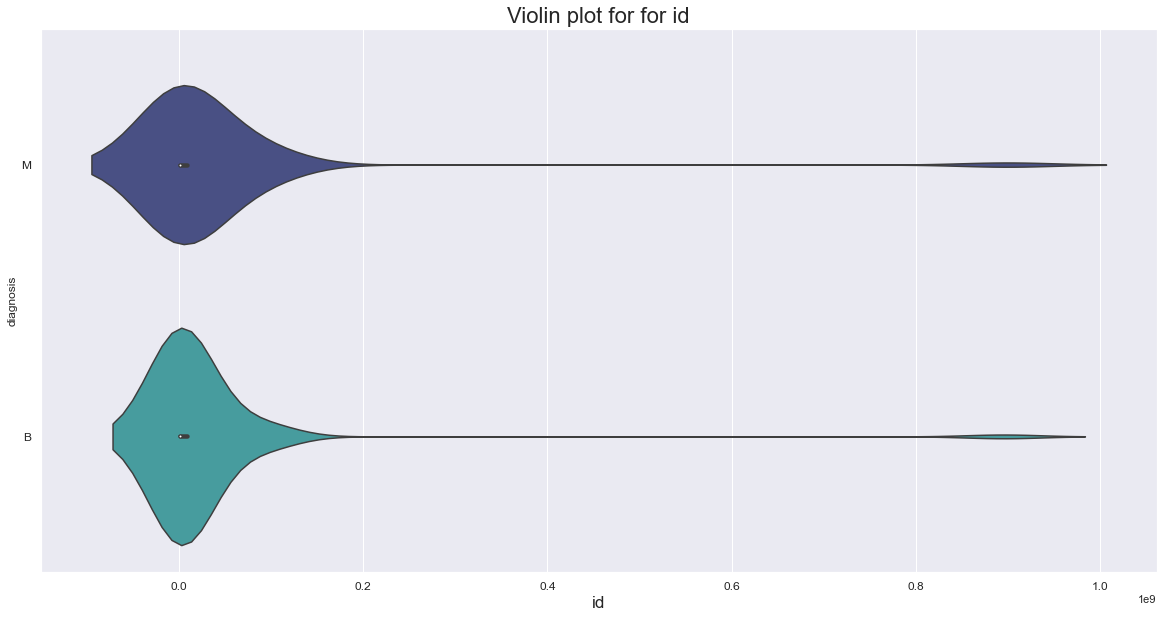

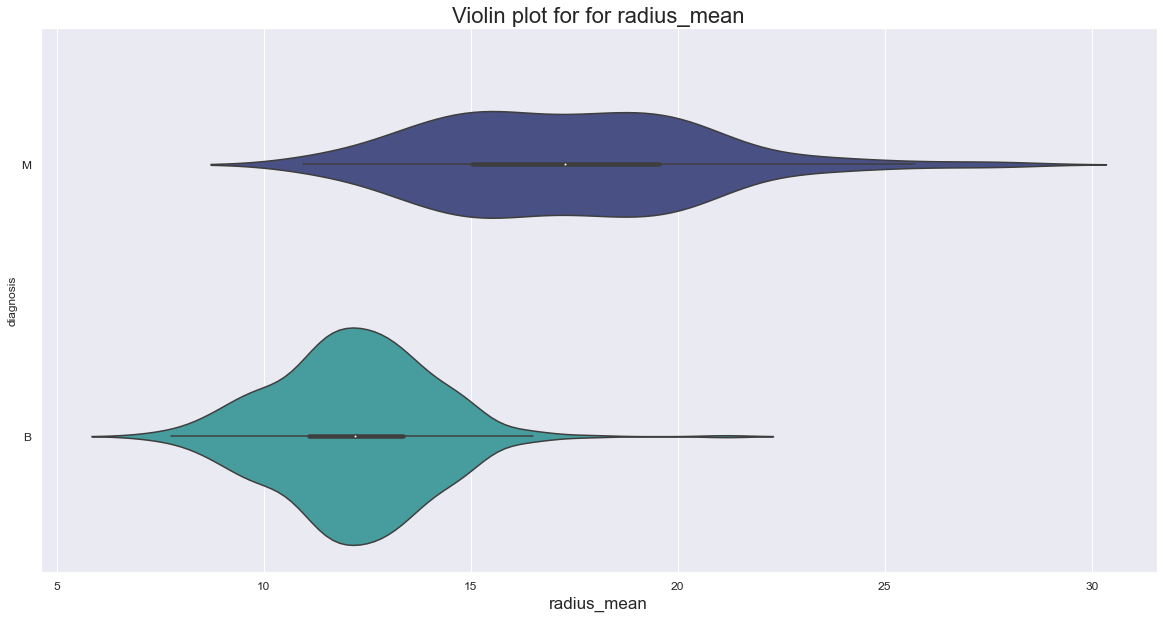

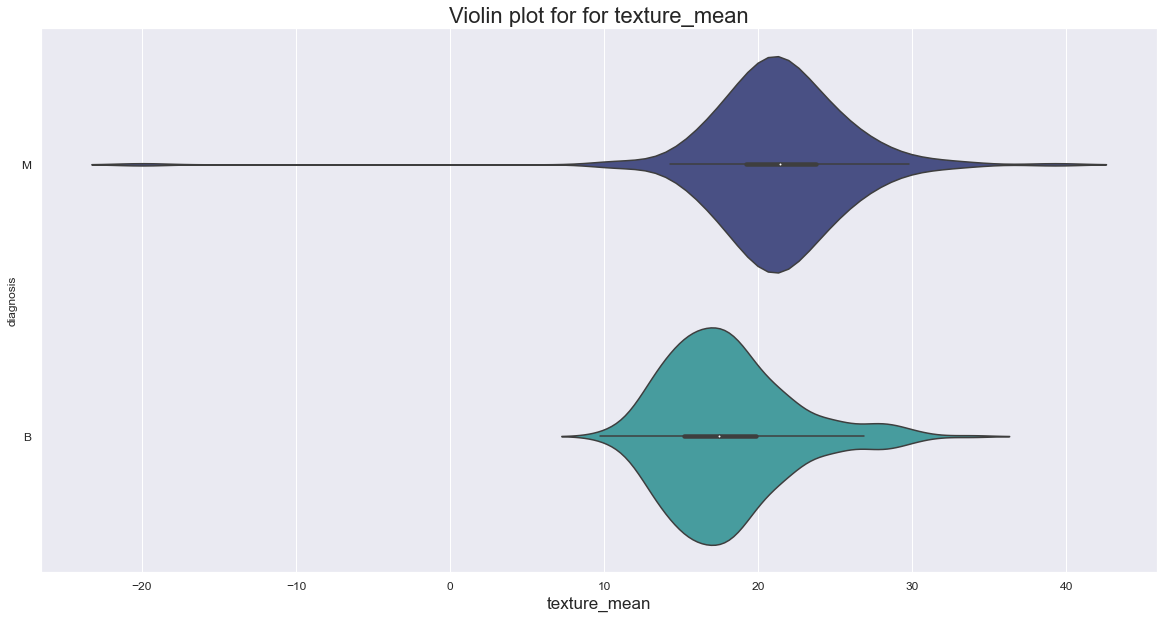

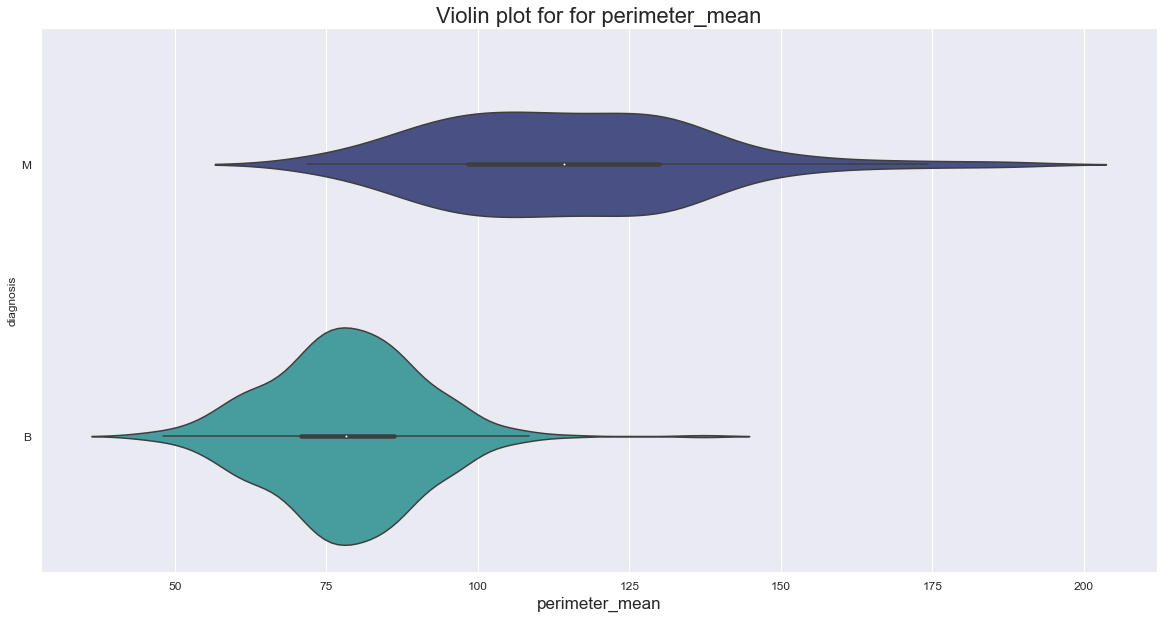

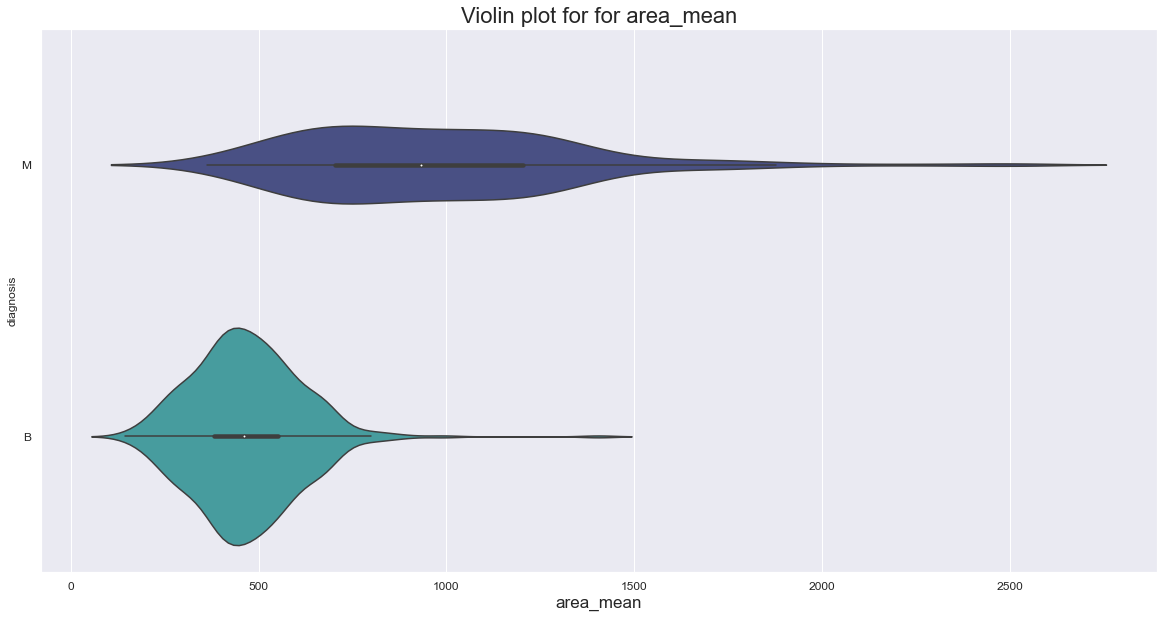

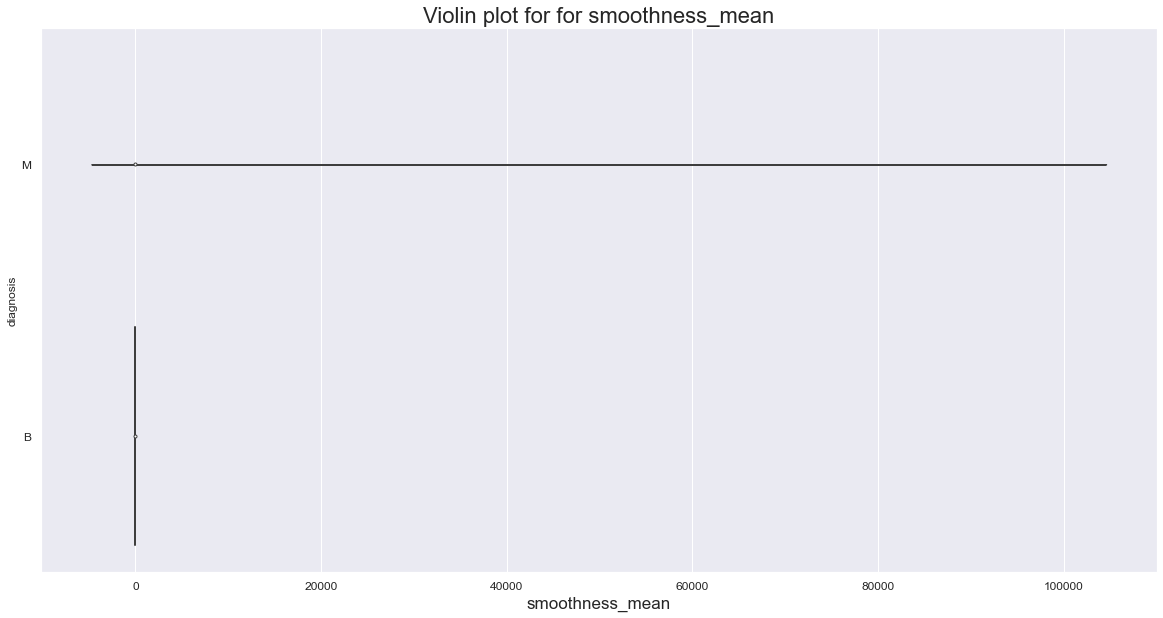

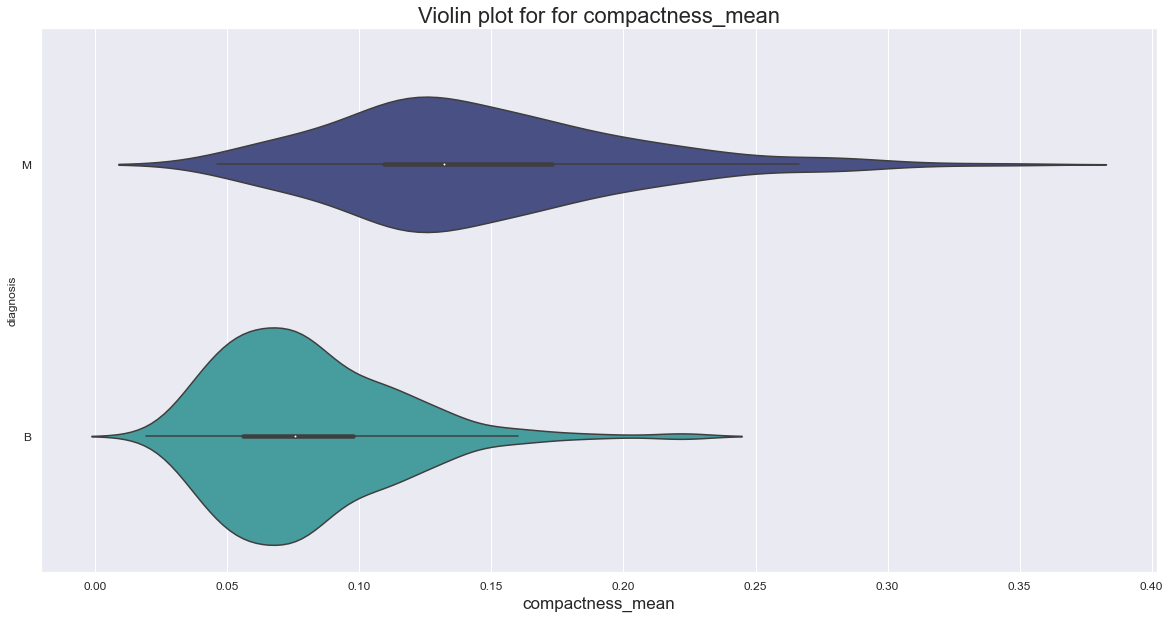

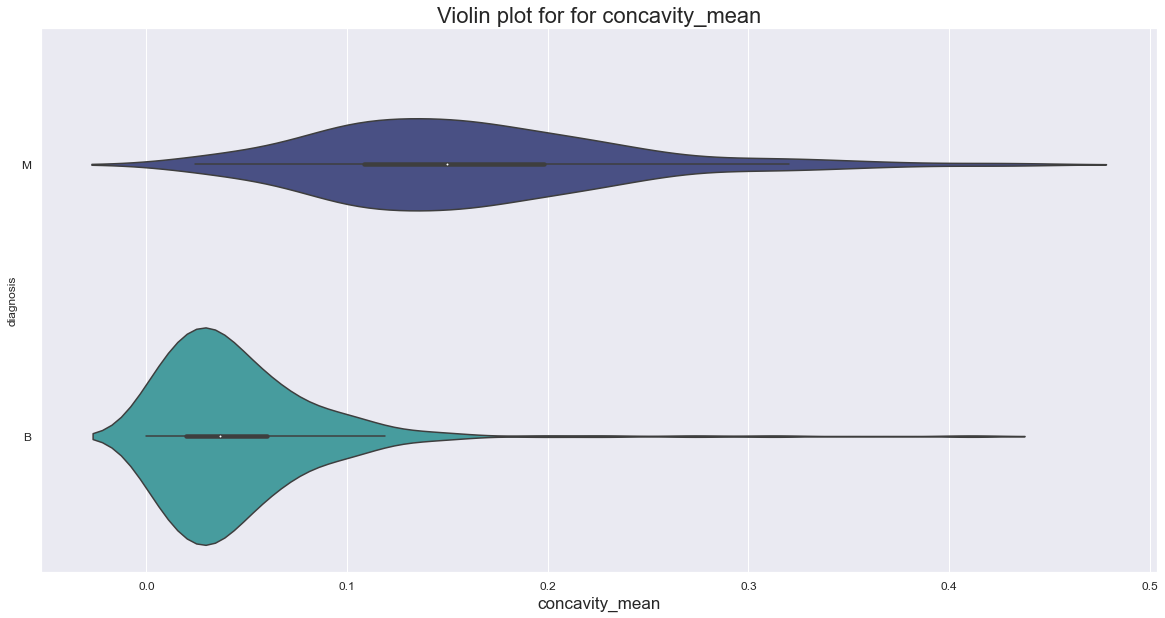

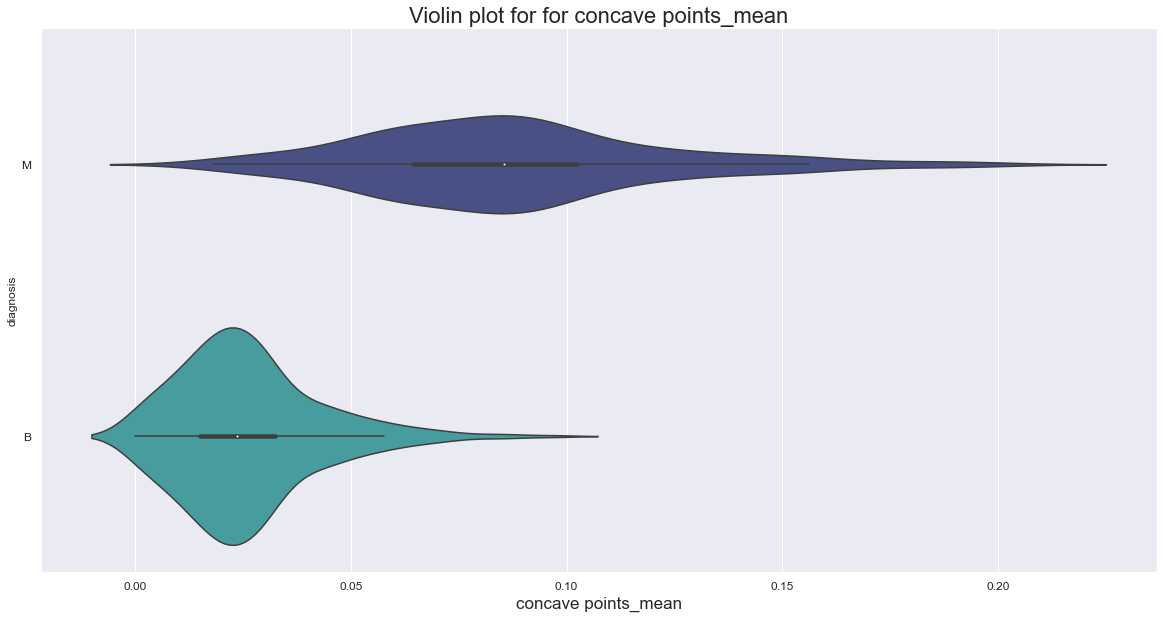

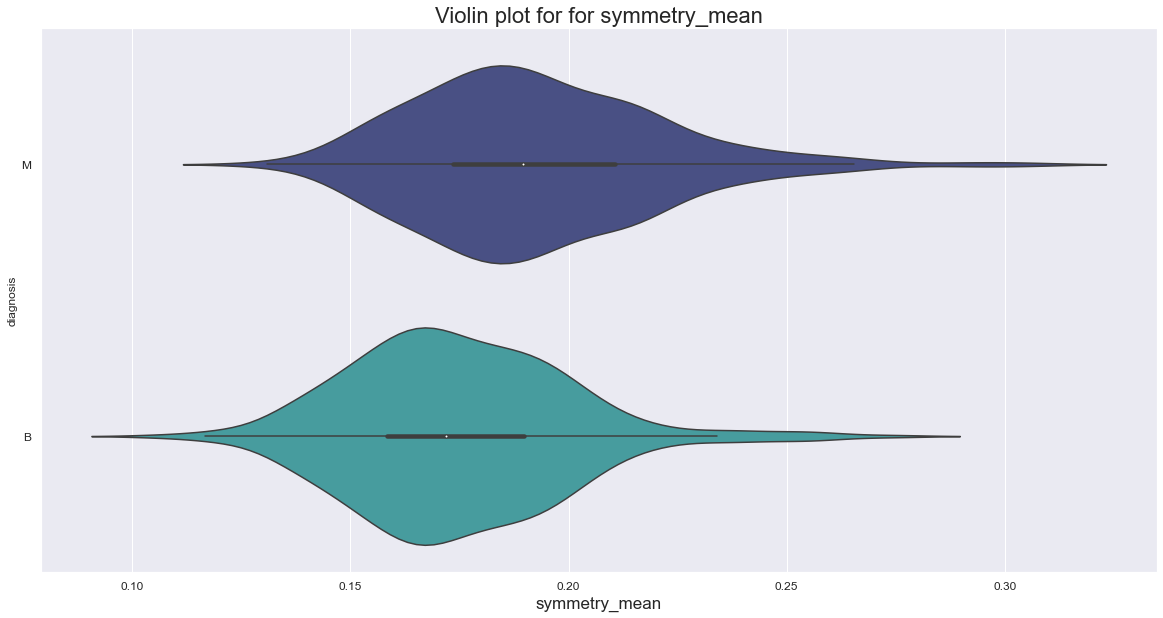

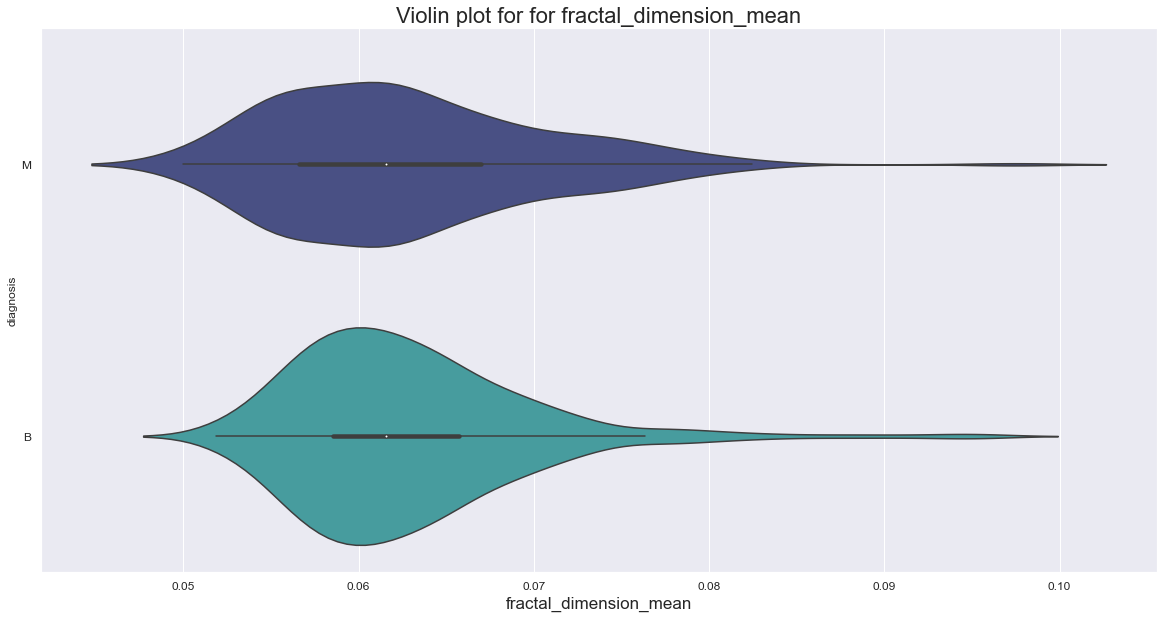

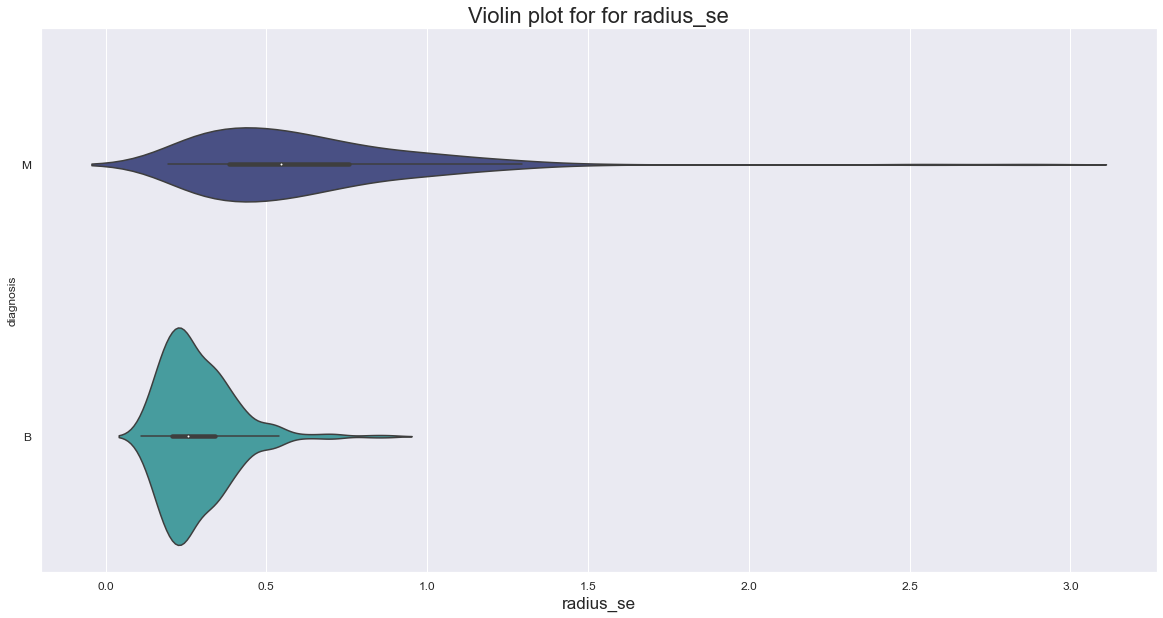

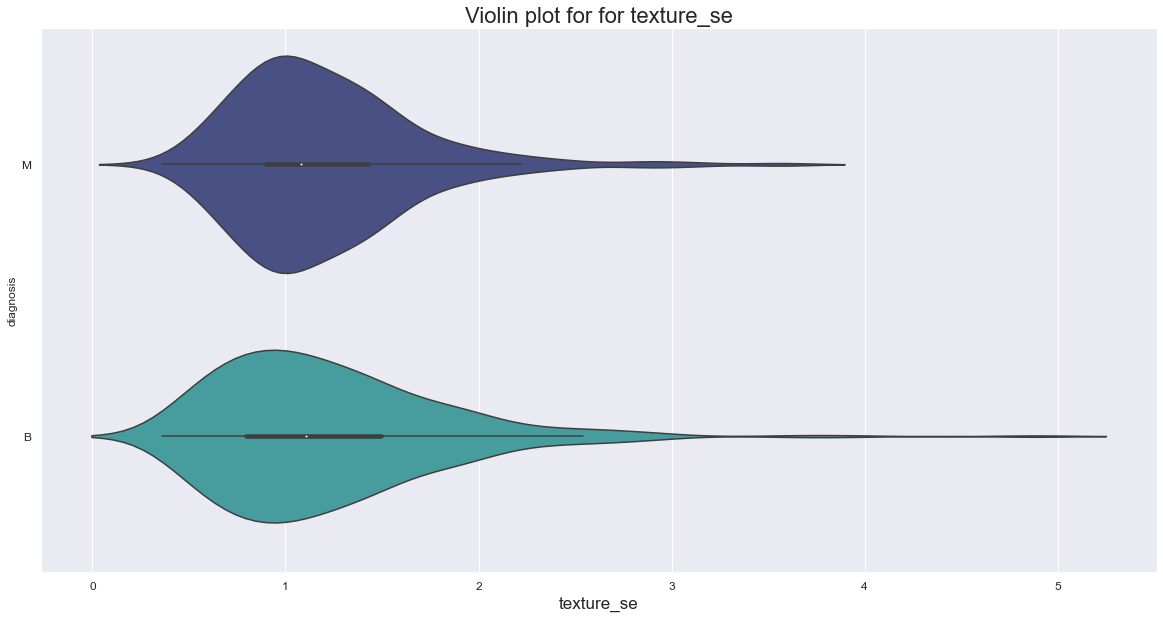

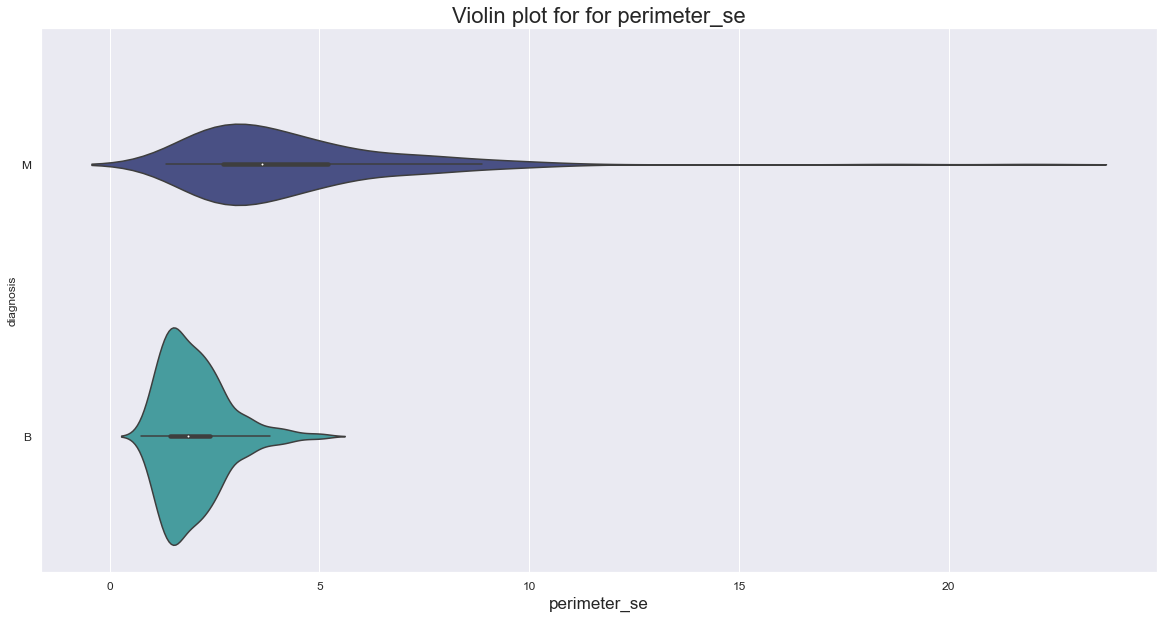

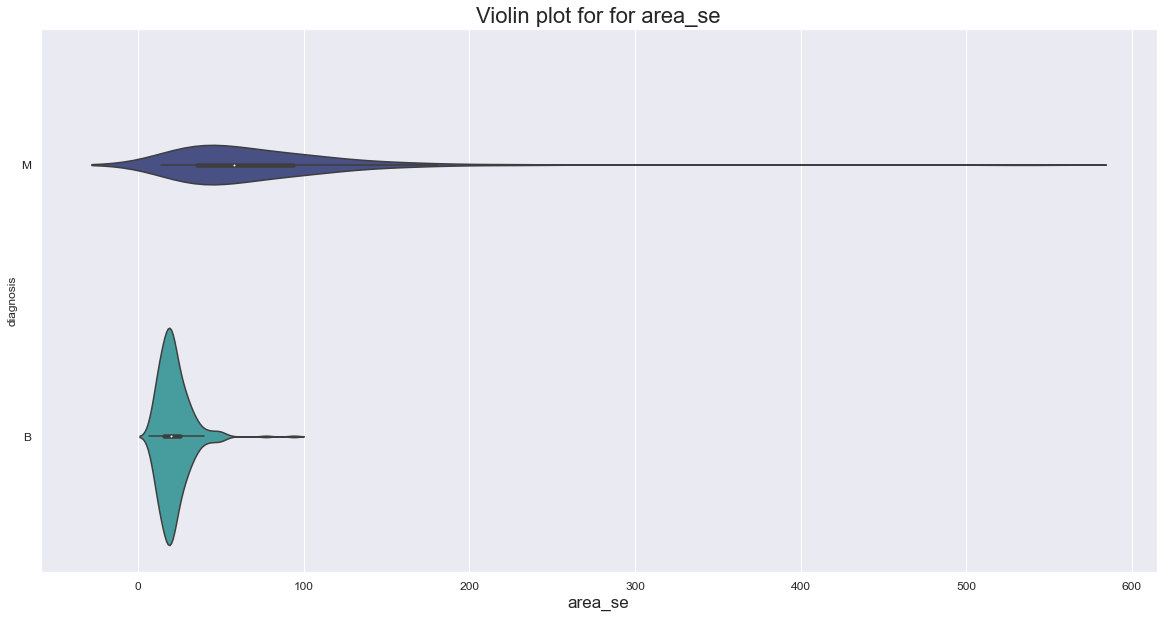

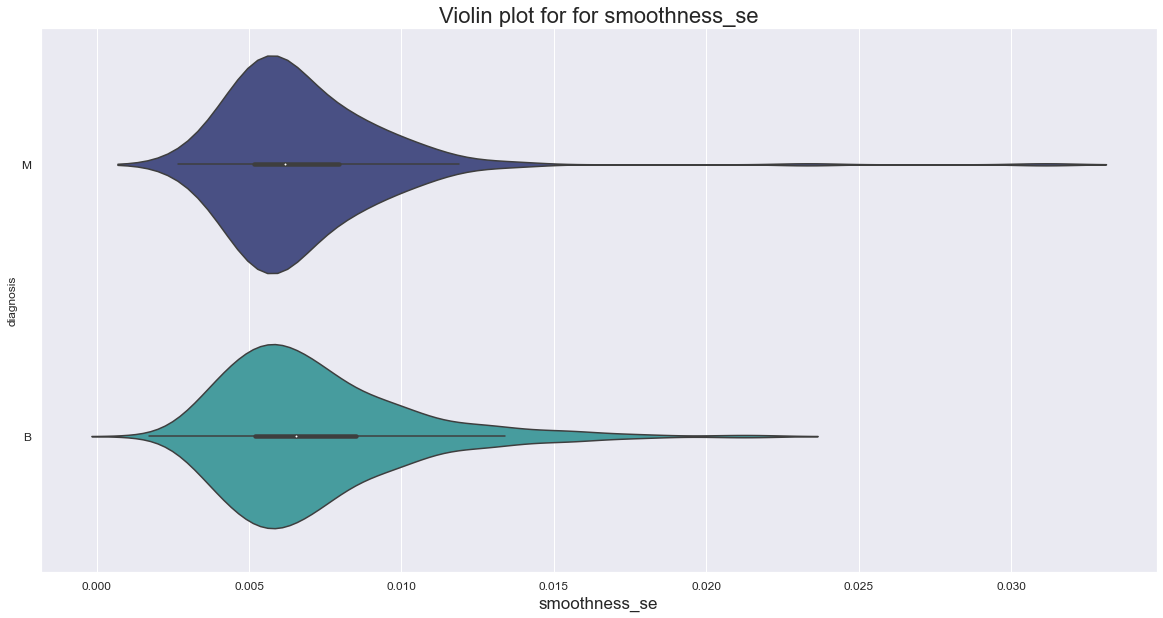

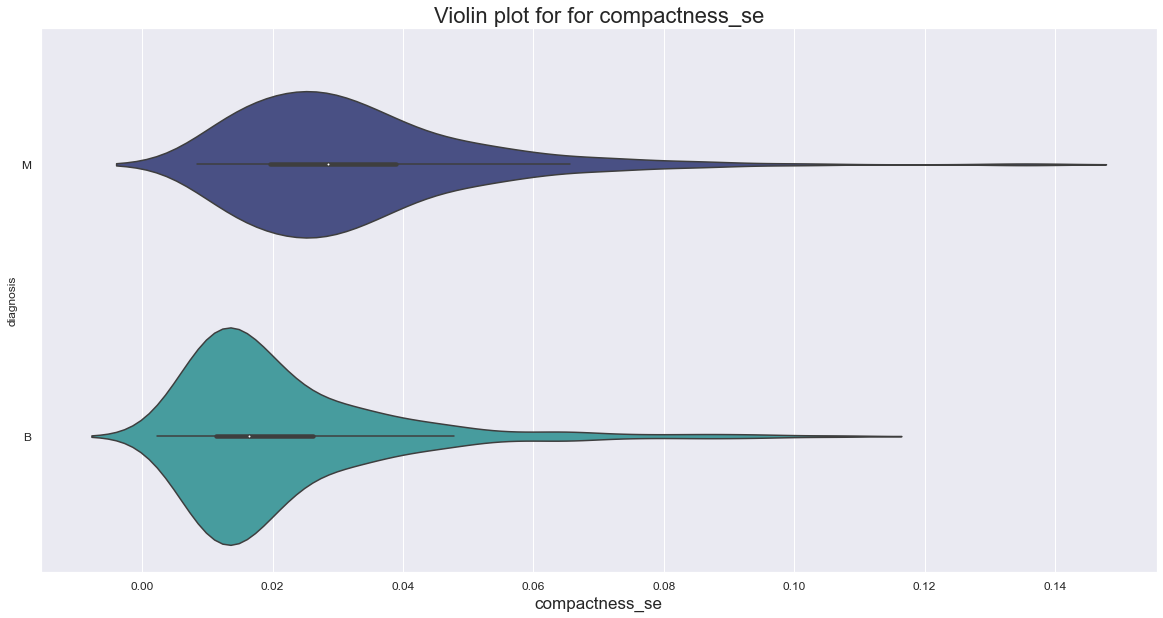

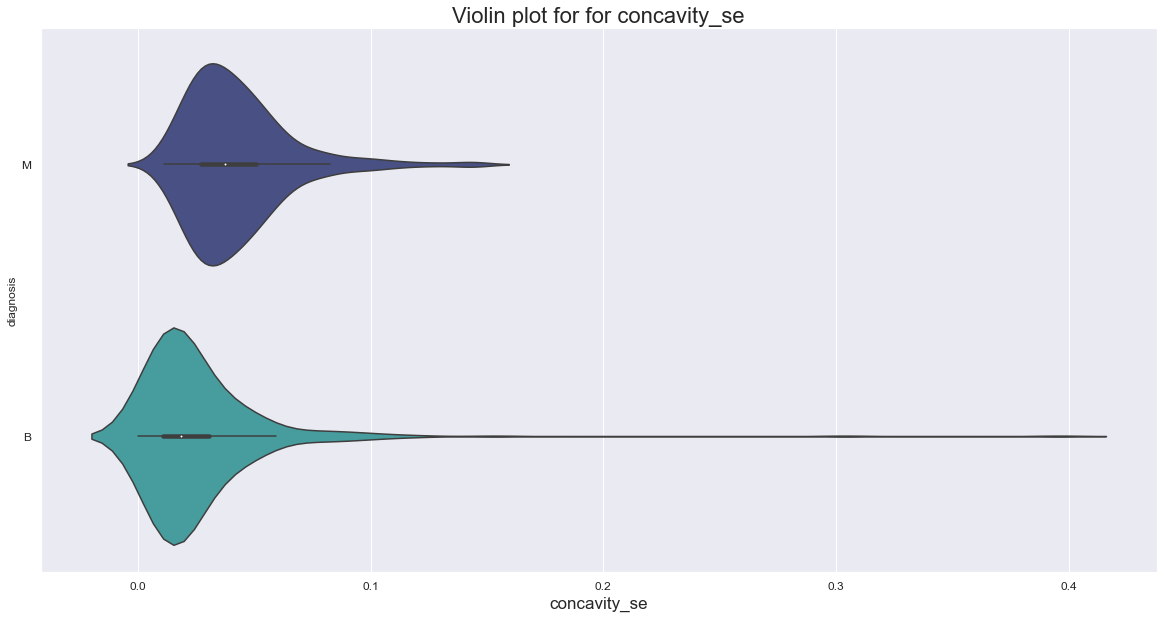

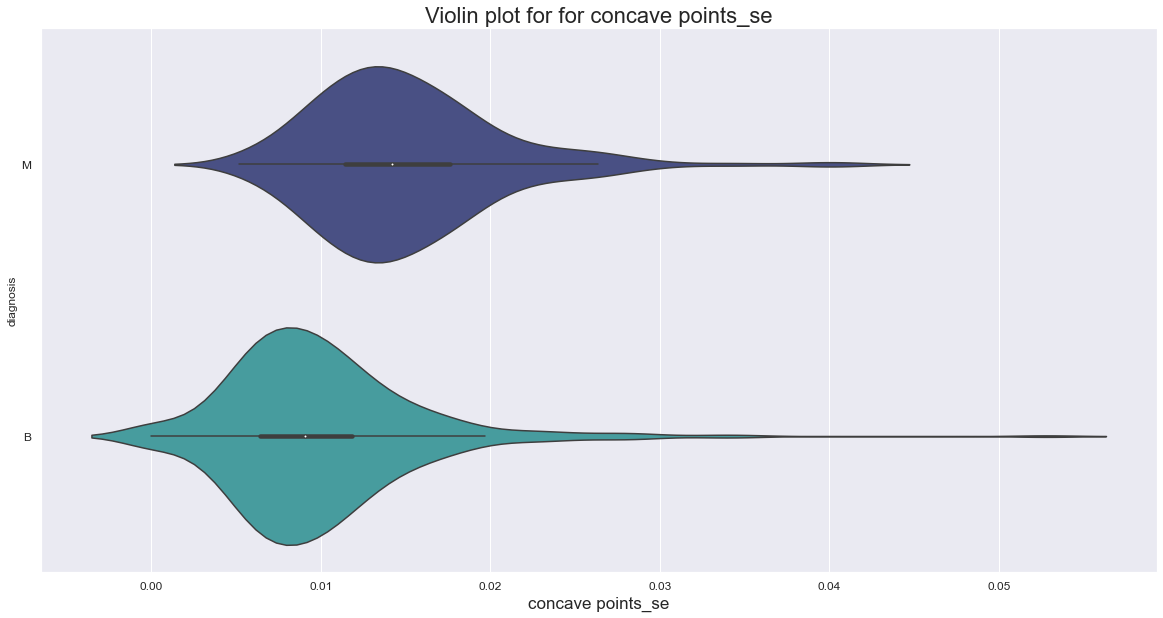

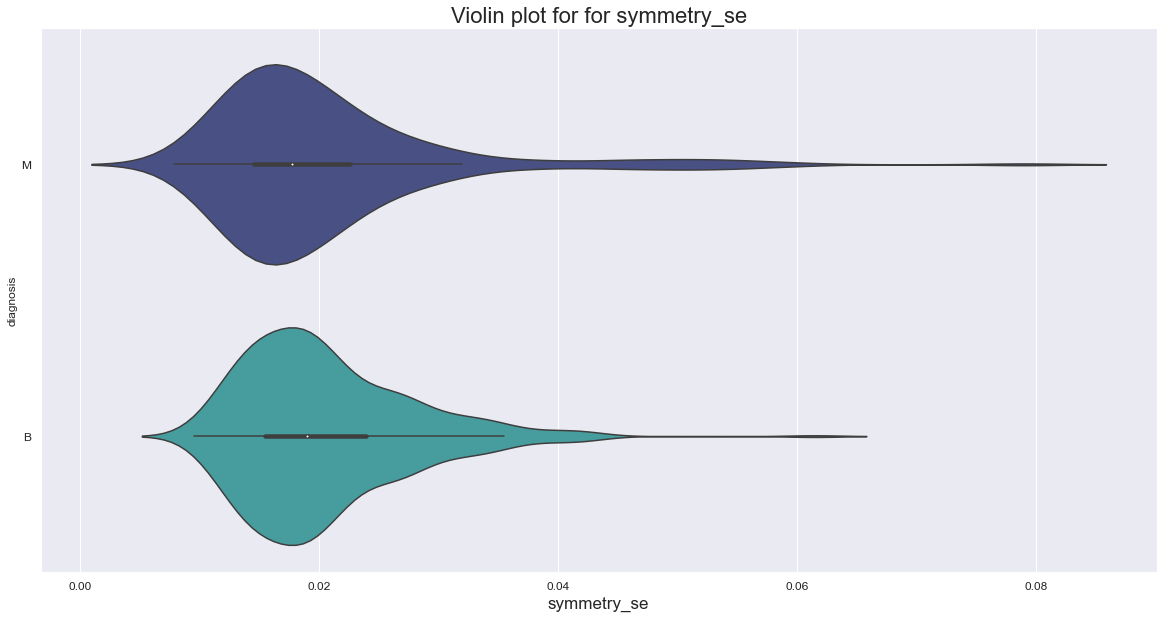

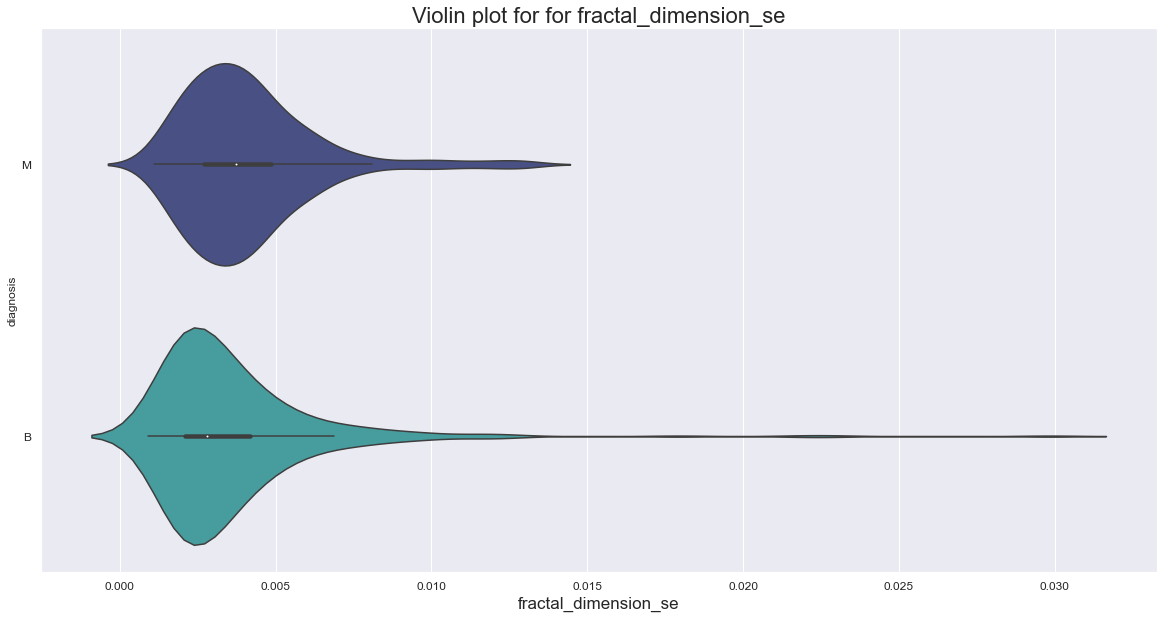

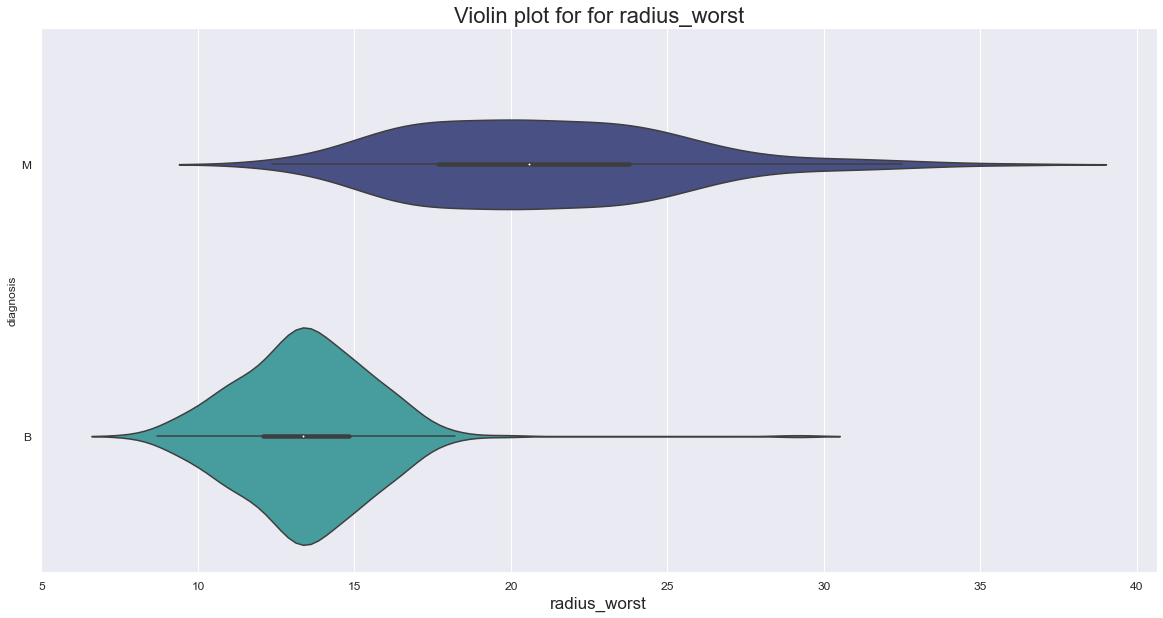

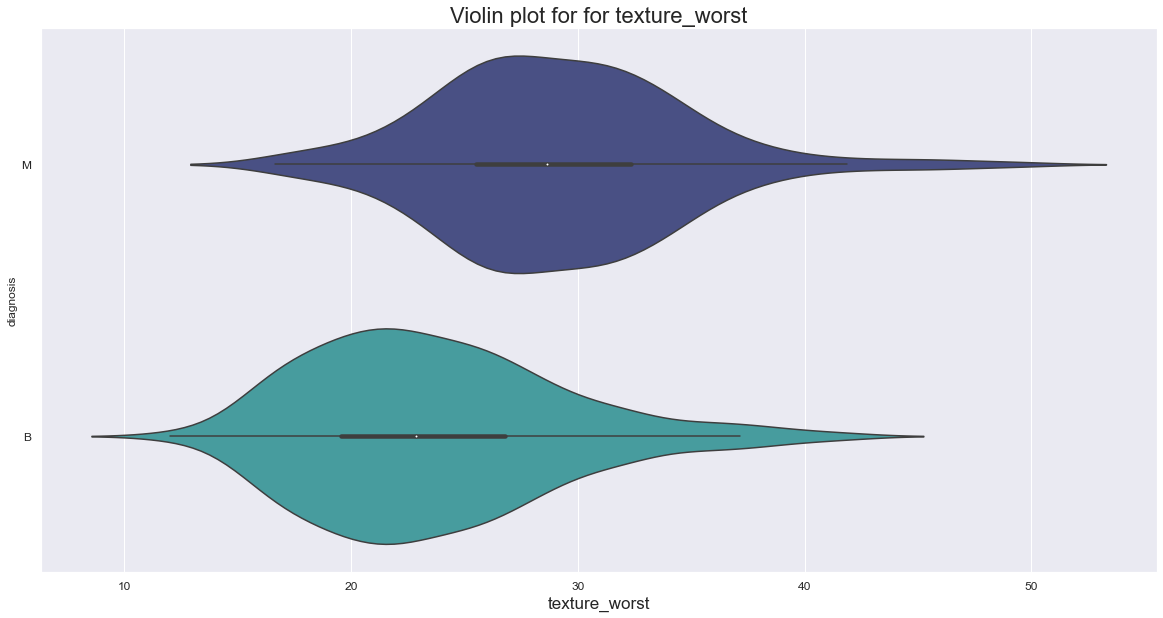

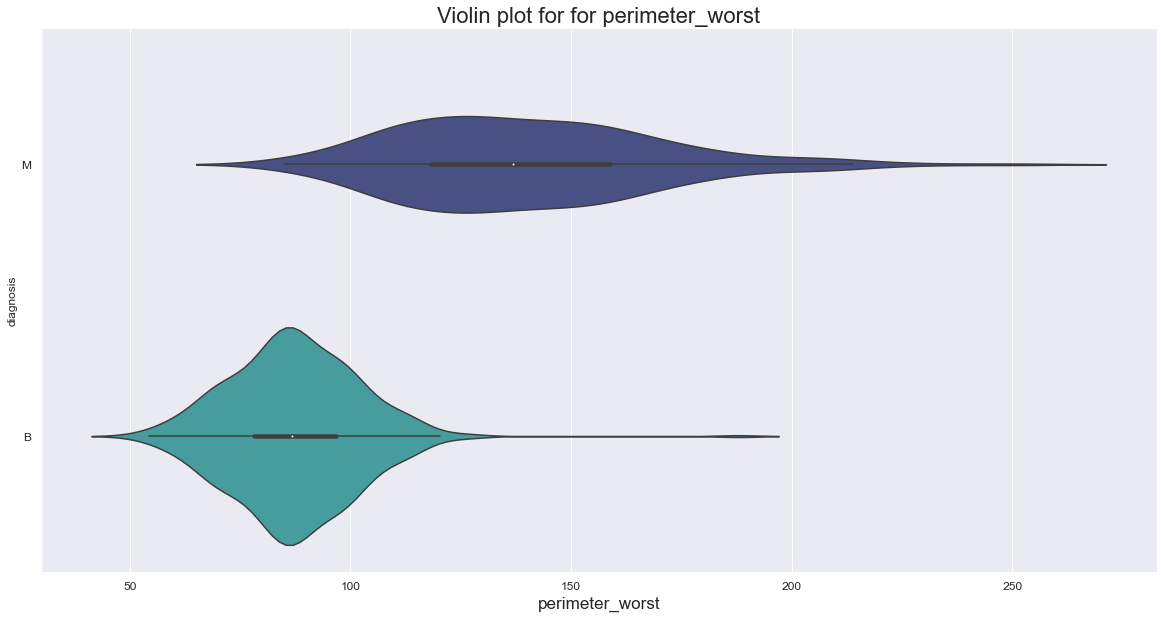

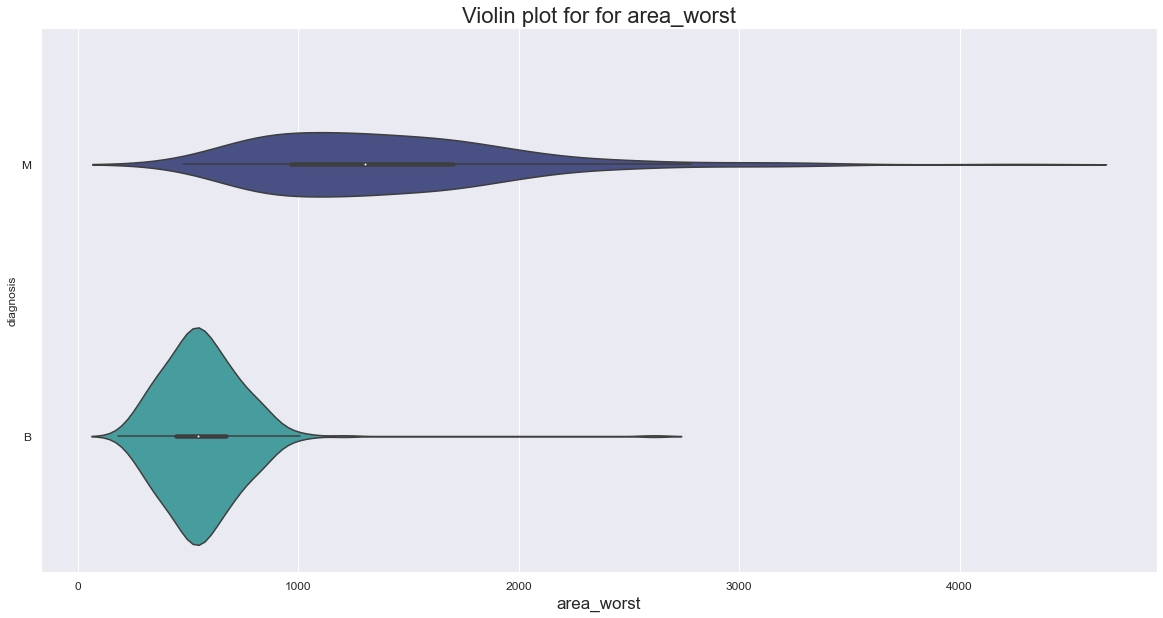

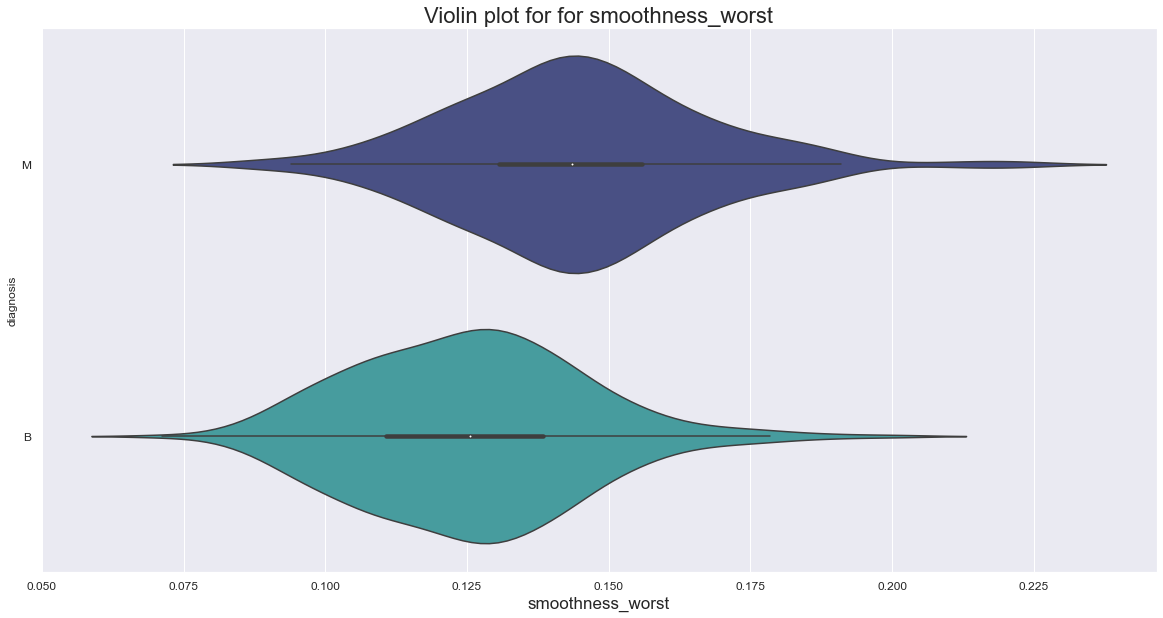

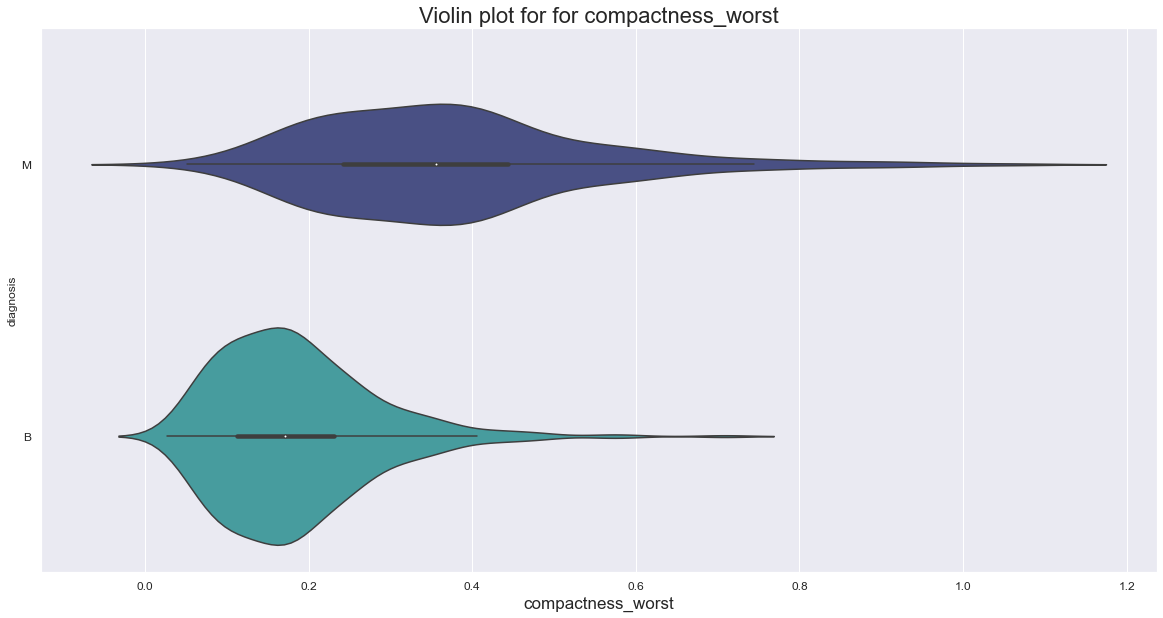

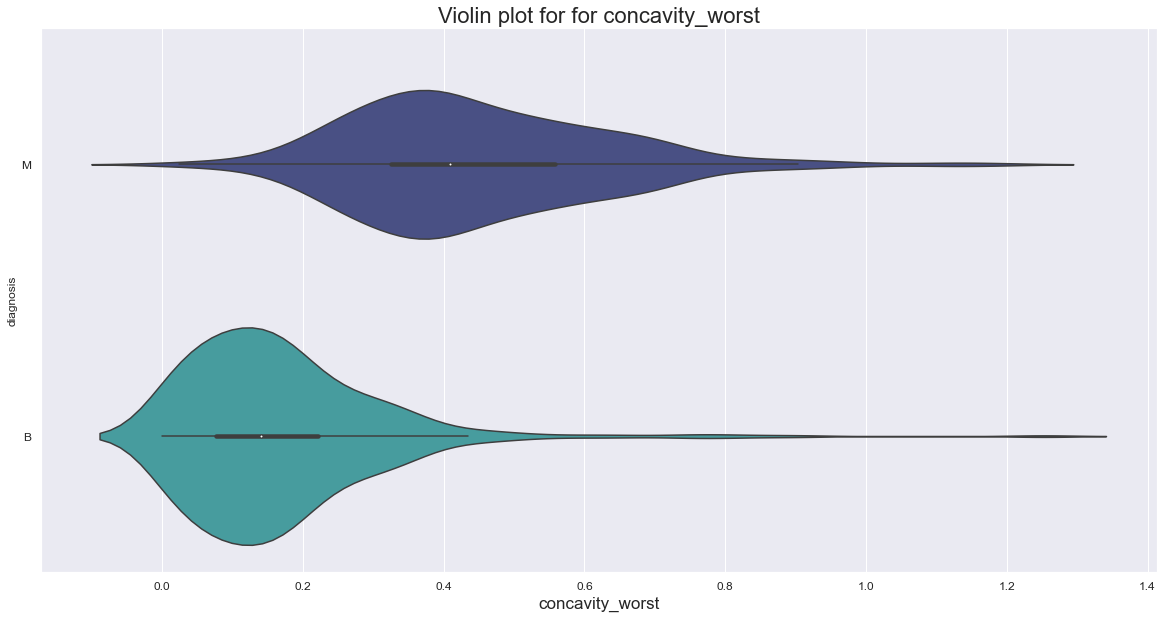

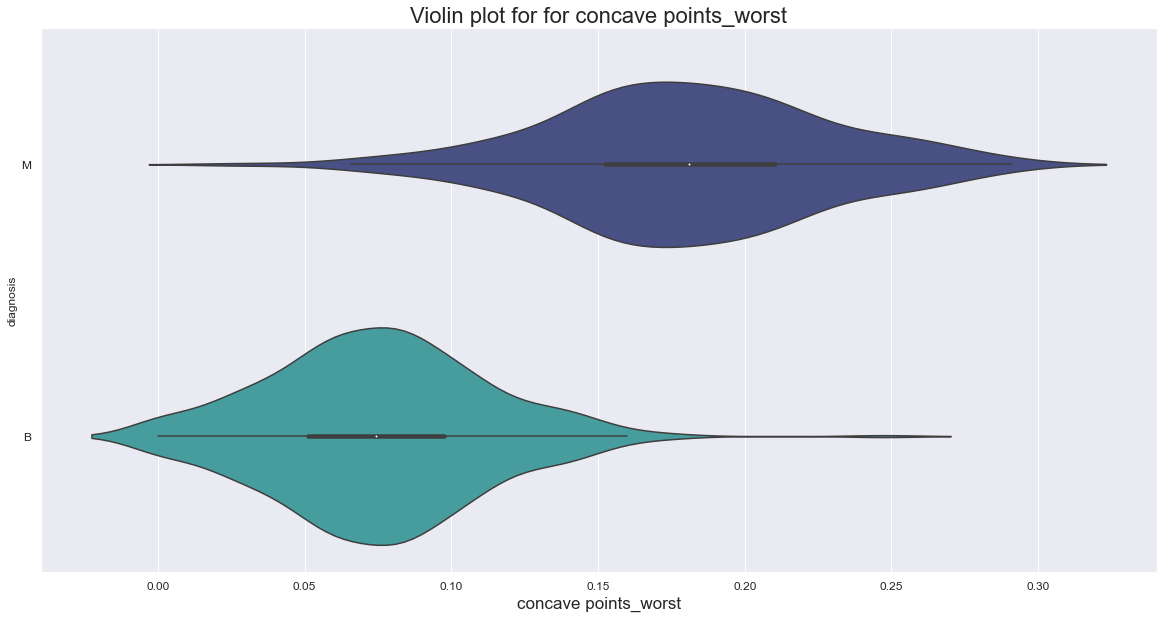

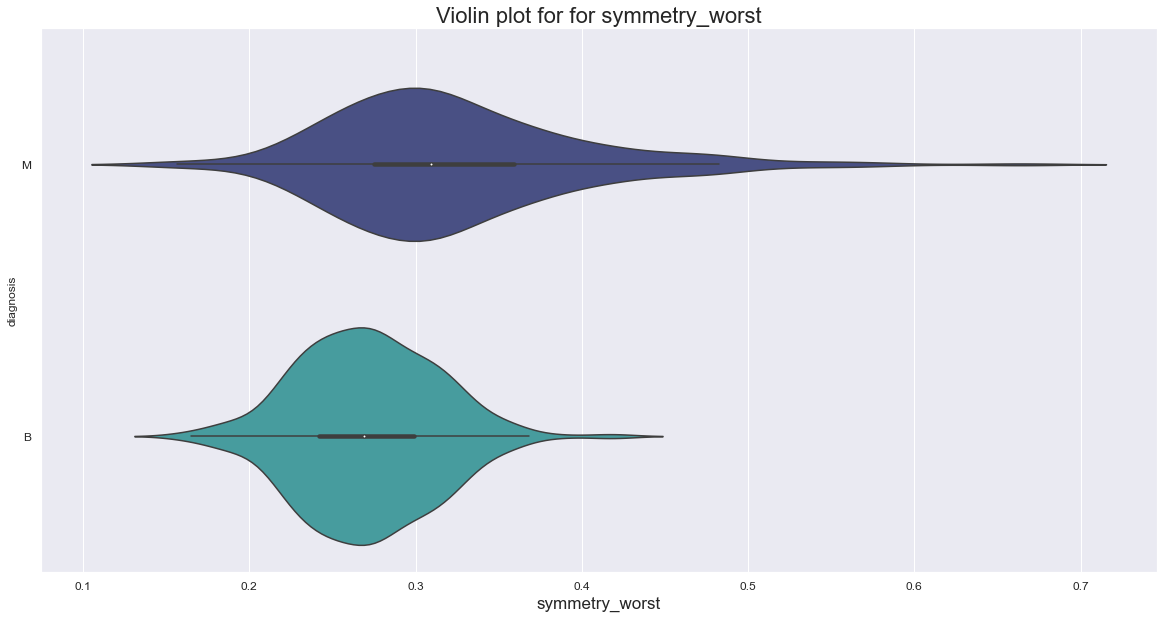

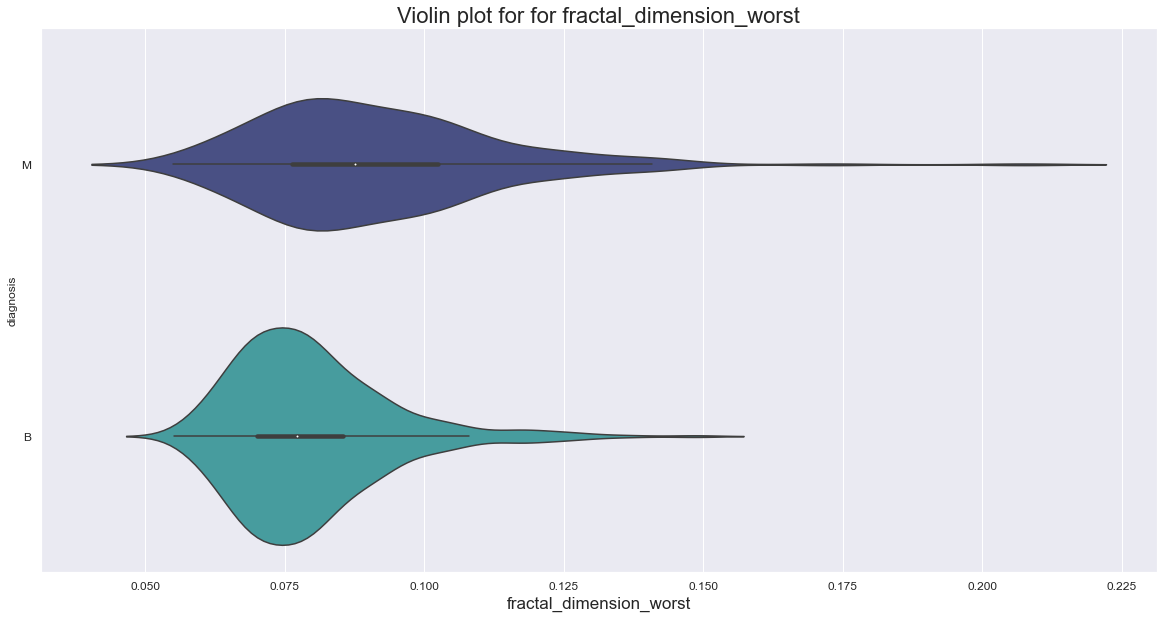

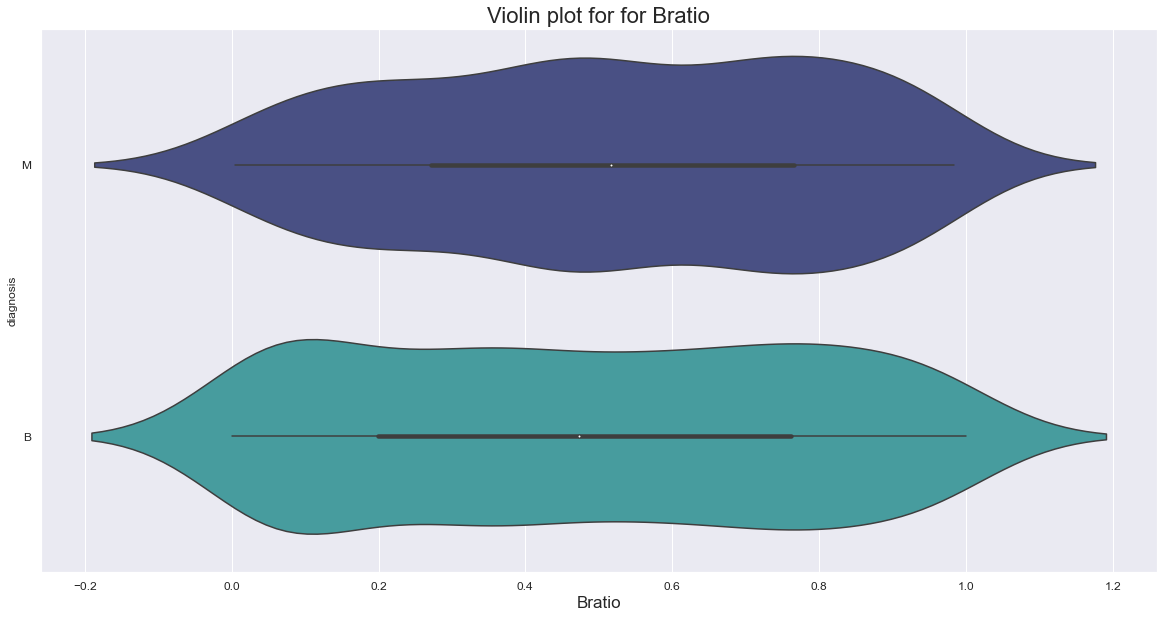

In [15]:
sns.set(rc={'figure.figsize':(20,10)})
width = 15
height = 8
feats = list(numeric_feats)
for feature in feats:
    fig=sns.violinplot(
        data = bc_train.append(bc_test),
        x=feature, 
        y='diagnosis',
        palette = 'mako',
        split=True
    )
    plt.title(f'Violin plot for for {feature}', fontsize=22)
    plt.xlabel(f'{feature}' , fontsize=17)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # plt.savefig(fig_dir+f'{feature}_viol.png')
    plt.show()

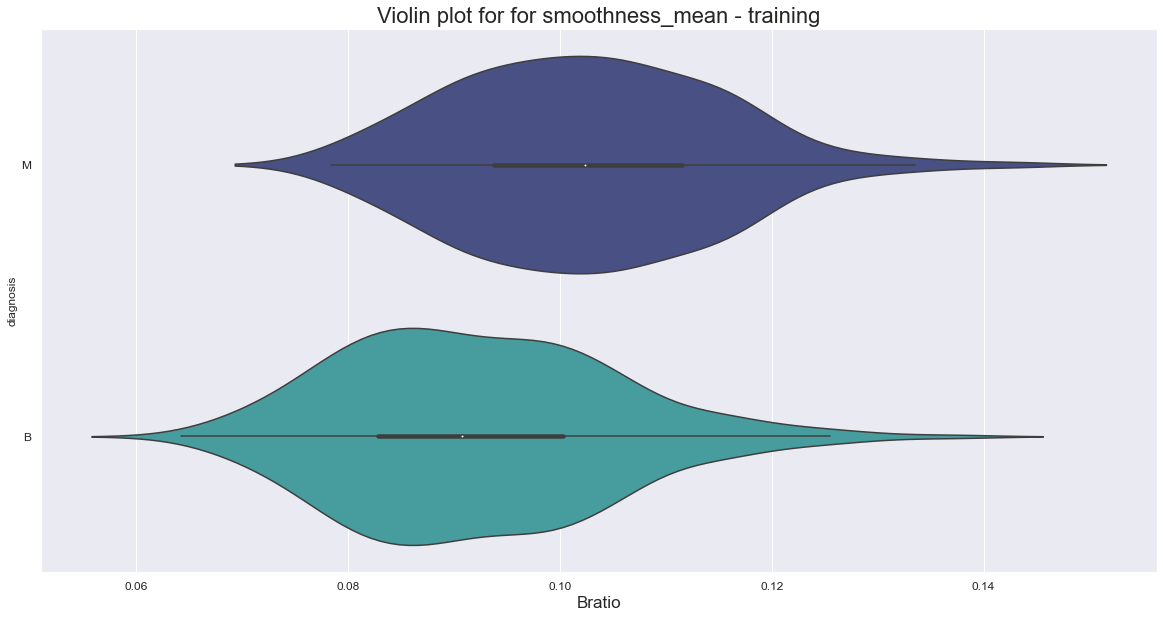

In [16]:
bc_train_2 = bc_train.drop(bc_train.loc[bc_train['smoothness_mean'] > 10].index)
fig=sns.violinplot(
    data = bc_train_2,
    x='smoothness_mean', 
    y='diagnosis',
    palette = 'mako',
    split=True
)
plt.title(f'Violin plot for for smoothness_mean - training', fontsize=22)
plt.xlabel(f'{feature}' , fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig(fig_dir+f'smoothness_mean_viol_train_2.png')
plt.show()

In [17]:
def detect_outliers(df,feature):
    outlier_indices = []
    c=feature
    Q1 = np.percentile(df[c],25)
    Q3 = np.percentile(df[c],75)
    IQR = Q3 - Q1
    outlier_step = IQR * 1.5
    upper = outlier_step+Q3
    lower = Q1-outlier_step
    outlier_list_col = df[(df[c] < lower) | (df[c] > upper)].index

    return df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)] , upper , lower

for feat in numeric_feats:
    outliers , upper, lower = detect_outliers(bc_train.fillna(bc_train.mean()),feat)
    print(f'Feature: {feat}, Upper: {round(upper,2)}, Lower: {round(lower,2)}, Count: {len(outliers)}')

<ipython-input-17-6b6d4bc55010>:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  outliers , upper, lower = detect_outliers(bc_train.fillna(bc_train.mean()),feat)


Feature: id, Upper: 20973455.88, Lower: -11193303.12, Count: 60
Feature: radius_mean, Upper: 21.1, Lower: 6.13, Count: 14
Feature: texture_mean, Upper: 30.25, Lower: 7.48, Count: 8
Feature: perimeter_mean, Upper: 144.47, Lower: 34.14, Count: 10
Feature: area_mean, Upper: 1250.16, Lower: -67.14, Count: 28
Feature: smoothness_mean, Upper: 0.13, Lower: 0.06, Count: 5
Feature: compactness_mean, Upper: 0.23, Lower: -0.04, Count: 11
Feature: concavity_mean, Upper: 0.28, Lower: -0.12, Count: 12
Feature: concave points_mean, Upper: 0.15, Lower: -0.06, Count: 6
Feature: symmetry_mean, Upper: 0.25, Lower: 0.11, Count: 8
Feature: fractal_dimension_mean, Upper: 0.08, Lower: 0.04, Count: 13
Feature: radius_se, Upper: 0.83, Lower: -0.13, Count: 29
Feature: texture_se, Upper: 2.4, Lower: -0.17, Count: 13
Feature: perimeter_se, Upper: 5.78, Lower: -0.92, Count: 27
Feature: area_se, Upper: 82.97, Lower: -21.37, Count: 45
Feature: smoothness_se, Upper: 0.01, Lower: 0.0, Count: 20
Feature: compactness_se

In [18]:
num_positive_target = len(bc_train.append(bc_test).loc[bc_train.append(bc_test).diagnosis=='M'])
num_negative_target = len(bc_train.append(bc_test).loc[bc_train.append(bc_test).diagnosis=='B'])
percentage_positive = round((num_positive_target/bc_train.append(bc_test).shape[0])*100,2)
percentage_negative = round((num_negative_target/bc_train.append(bc_test).shape[0])*100,2)
print('Number of positive target observations:',num_positive_target)
print('Number of negative target observations:',num_negative_target)
print(f'Percentage positive target variables: {percentage_positive} %')
print(f'Percentage negative target variables: {percentage_negative} %')
fig = px.pie(
    bc_train.append(bc_test), 
    names='diagnosis',
    color_discrete_sequence=px.colors.diverging.balance,
    title='Target Variable Ratio'
)
# fig.write_image(fig_dir+"default_ratio_after.png")
fig.show()


Number of positive target observations: 212
Number of negative target observations: 357
Percentage positive target variables: 37.26 %
Percentage negative target variables: 62.74 %


## Question 2.2

#### SMOTE

In [20]:
X_train = bc_train.drop(['diagnosis'],axis=1)
X_train.gender = X_train.gender.replace({'F':0})
X_train = X_train.fillna(X_train.mean())
y_train = bc_train.diagnosis

clf =  DecisionTreeClassifier(random_state=42)
smt = SMOTE(random_state=42)
pipeline = make_pipeline(smt, clf)
scores_SMOTE_p = cv_score(pipeline , X_train , y_train,cv=5)
scores_normal = cv_score(clf, X_train , y_train,cv=5)
print(f'CV Score with SMOTE and pipeline: {scores_SMOTE_p.mean()}')
print(f'CV Score normal: {scores_normal.mean()}')

CV Score with SMOTE and pipeline: 0.8769230769230768
CV Score normal: 0.8871794871794872


In [21]:
X_train = bc_train.drop(['diagnosis'],axis=1)
X_train.gender = X_train.gender.replace({'F':0})
X_train = X_train.fillna(X_train.mean())
y_train = bc_train.diagnosis

X_test = bc_test.drop(['diagnosis'],axis=1)
X_test.gender = X_test.gender.replace({'F':0})
y_test = bc_test.diagnosis

smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_resample(X_train, y_train)

In [22]:
num_positive_target = len(y_train_SMOTE.loc[y_train_SMOTE=='M'])
num_negative_target = len(y_train_SMOTE.loc[y_train_SMOTE=='B'])
percentage_positive = round((num_positive_target/y_train_SMOTE.shape[0])*100,2)
percentage_negative = round((num_negative_target/y_train_SMOTE.shape[0])*100,2)
print('Number of positive target observations:',num_positive_target)
print('Number of negative target observations:',num_negative_target)
print(f'Percentage positive target variables: {percentage_positive} %')
print(f'Percentage negative target variables: {percentage_negative} %')
fig = px.pie(
    y_train_SMOTE, 
    names='diagnosis',
    color_discrete_sequence=px.colors.diverging.balance,
    title='Target Variable Ratio'
)
# fig.write_image(fig_dir+"default_ratio_after.png")
fig.show()


Number of positive target observations: 246
Number of negative target observations: 246
Percentage positive target variables: 50.0 %
Percentage negative target variables: 50.0 %


#### Feature Selection

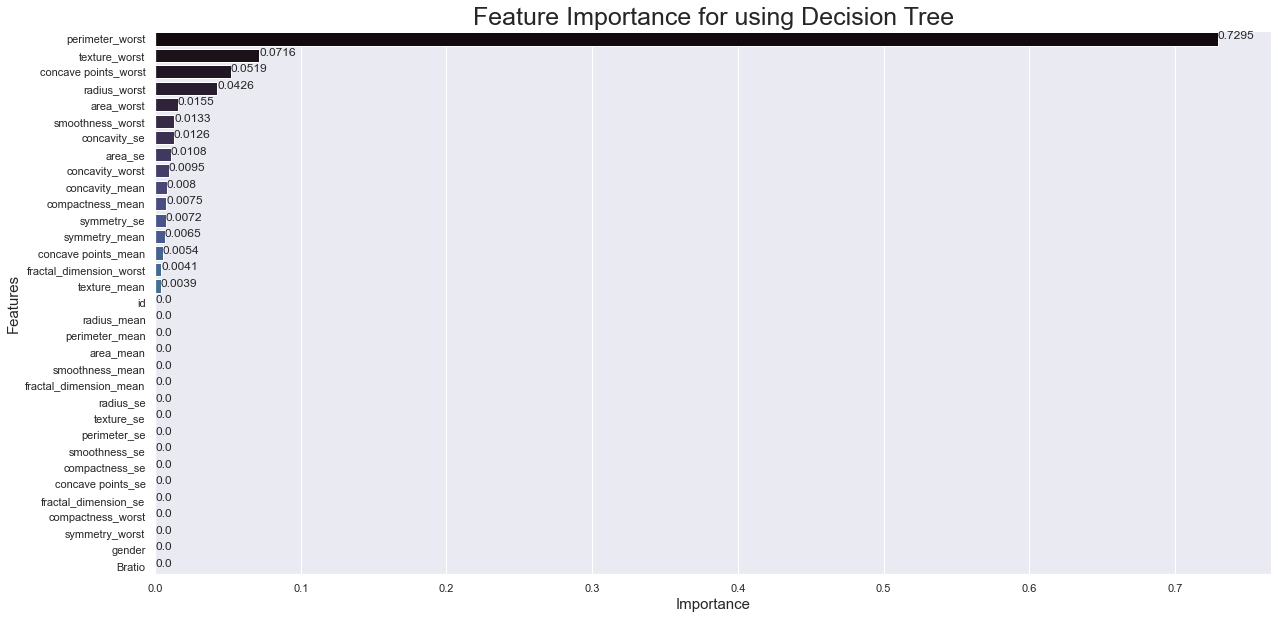

In [24]:
clf =  DecisionTreeClassifier(random_state=42)
clf.fit(X_train_SMOTE , y_train_SMOTE)
importances = list(clf.feature_importances_)
columns = list(X_train_SMOTE.columns.values)
n = len(importances)
for i in range(len(importances)-1):
    for j in range(0,n-i-1):
        if importances[j]<importances[j+1]:
            importances[j], importances[j+1] = importances[j+1], importances[j]
            columns[j], columns[j+1] = columns[j+1], columns[j]
            
plt.figure(figsize = (20,10))
fig = sns.barplot(y=columns,
            x=importances,
            palette='mako'
)
dt_ranking = columns
for index, value in enumerate(np.round(np.array(importances),4)):
    plt.text(value, index, str(value), fontsize=12)
plt.title('Feature Importance for using Decision Tree', fontsize=25)
plt.xlabel('Importance' , fontsize=15)
plt.ylabel('Features', fontsize=15)
# plt.savefig(fig_dir+'feat_impo_dt_bc.png')
plt.show()

In [25]:
index_start = columns.index('id')
index_end = len(columns)
X_train_fs = X_train_SMOTE.drop(columns[index_start:index_end] , axis=1)
y_train_fs = y_train_SMOTE.copy()

#### Training & Prediction

In [27]:
X_test_pp = X_test.fillna(X_test.mean()).drop(columns[index_start:index_end] , axis=1)
clf.fit(X_train_fs,y_train_fs)

y_pred = clf.predict(X_test_pp)
acc = accuracy_score(y_pred,y_test)
print(f'Accuracy: {acc}')
print('Max Depth',clf.tree_.max_depth)

Accuracy: 0.9217877094972067
Max Depth 8


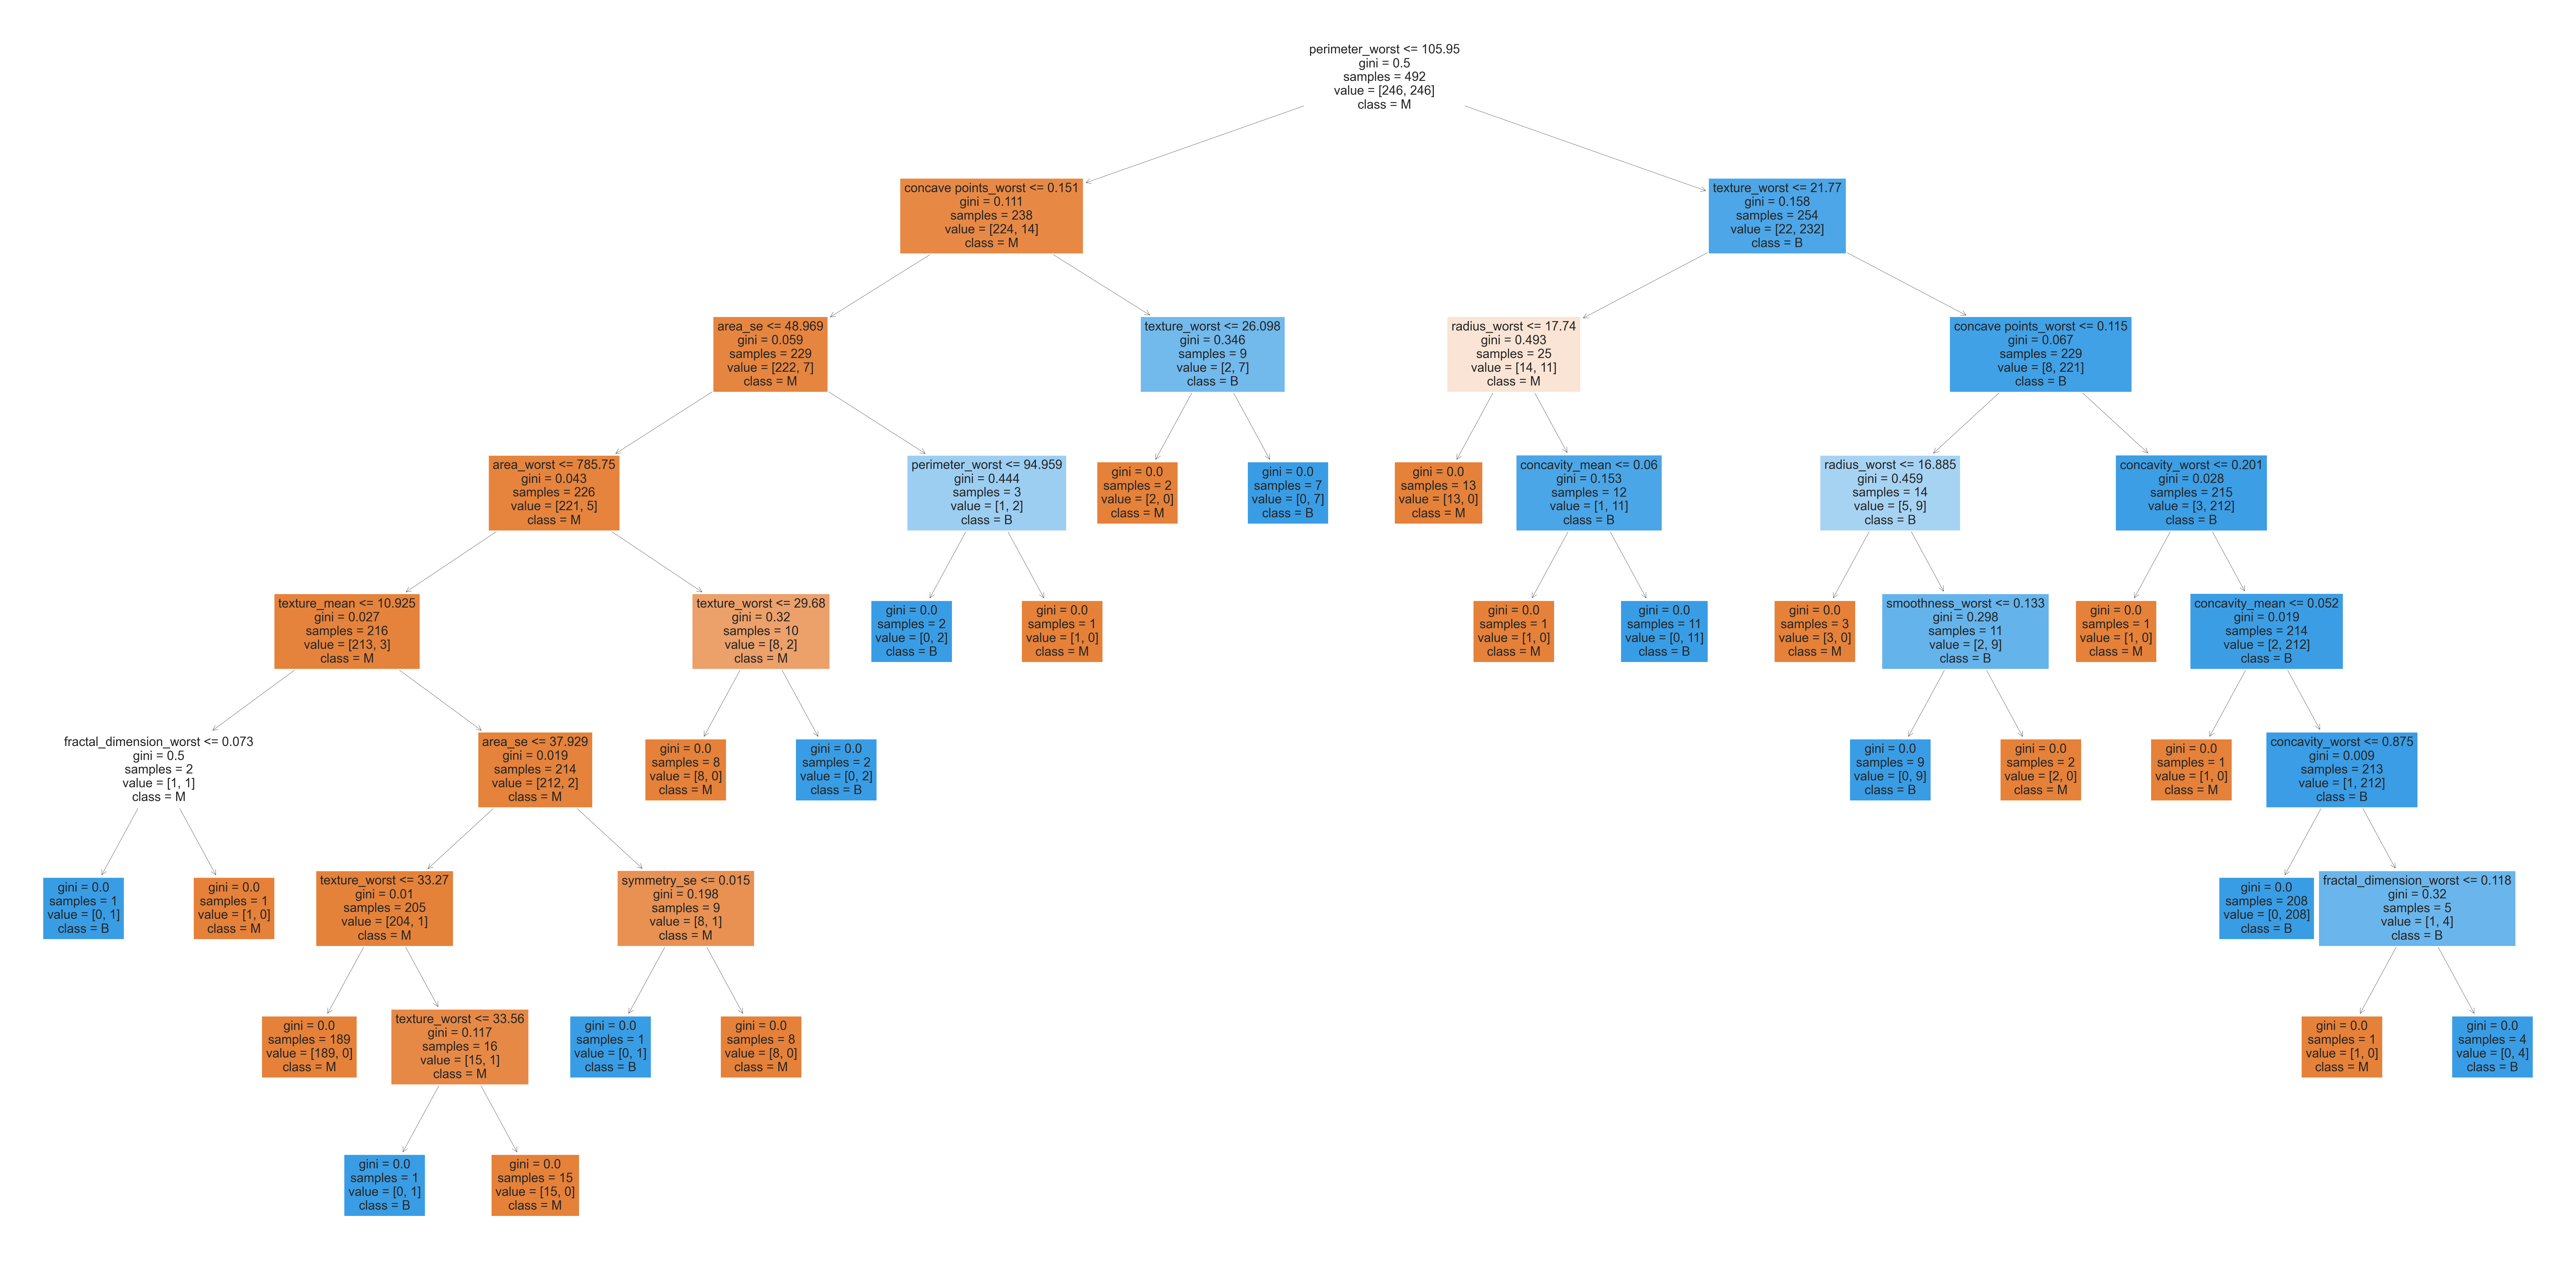

In [28]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,20), dpi=300)
out = tree.plot_tree(clf,feature_names=X_train_fs.columns,
                     class_names=['M','B'],filled=True,fontsize=11
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(0.2)
# fig.savefig(fig_dir+"decistion_tree_prePrune.png")

<AxesSubplot:title={'center':'Confusion Matrix for Decision Tree'}>

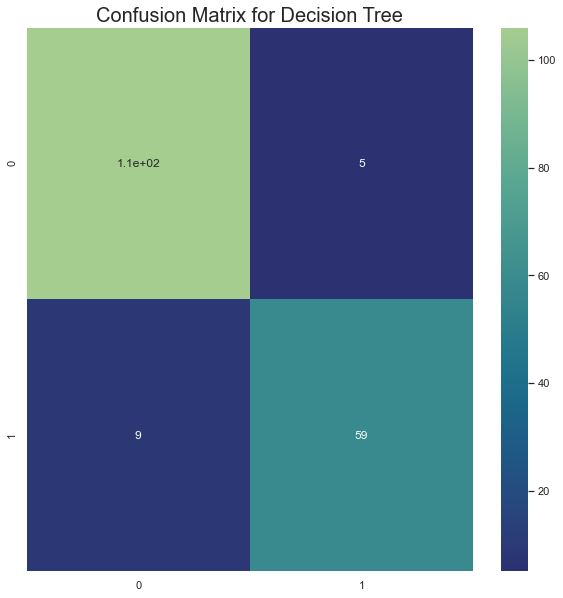

In [29]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
plt.title("Confusion Matrix for Decision Tree",fontsize=20)
sns.heatmap(
        data=cm,
        cmap='crest_r',
        annot=True,
)
# plt.savefig(fig_dir+'cm_dt_pre_prune.png')

<AxesSubplot:title={'center':'Confusion Matrix for Decision Tree'}>

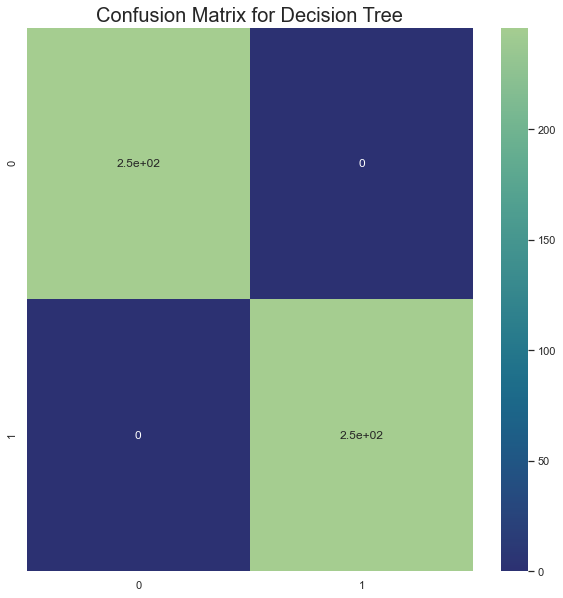

In [31]:
y_pred_train = clf.predict(X_train_fs)
cm = confusion_matrix(y_train_fs,y_pred_train)
plt.figure(figsize=(10,10))
plt.title("Confusion Matrix for Decision Tree",fontsize=20)
sns.heatmap(
        data=cm,
        cmap='crest_r',
        annot=True,
)
# plt.savefig(fig_dir+'cm_dt_pre_prune_test.png')

#### Pruning

In [32]:
path = clf.cost_complexity_pruning_path(X_train_fs,y_train_fs)
alphas = path['ccp_alphas']
params = {'ccp_alpha':alphas}
grid = GridSearchCV(clf,params)
grid.fit(X_train_fs, y_train_fs) 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test_pp)
acc = accuracy_score(grid_predictions,y_test)
print(f'Accuracy: {acc}')

{'ccp_alpha': 0.0027100271002710027}
Accuracy: 0.9329608938547486


<Figure size 1080x1080 with 0 Axes>

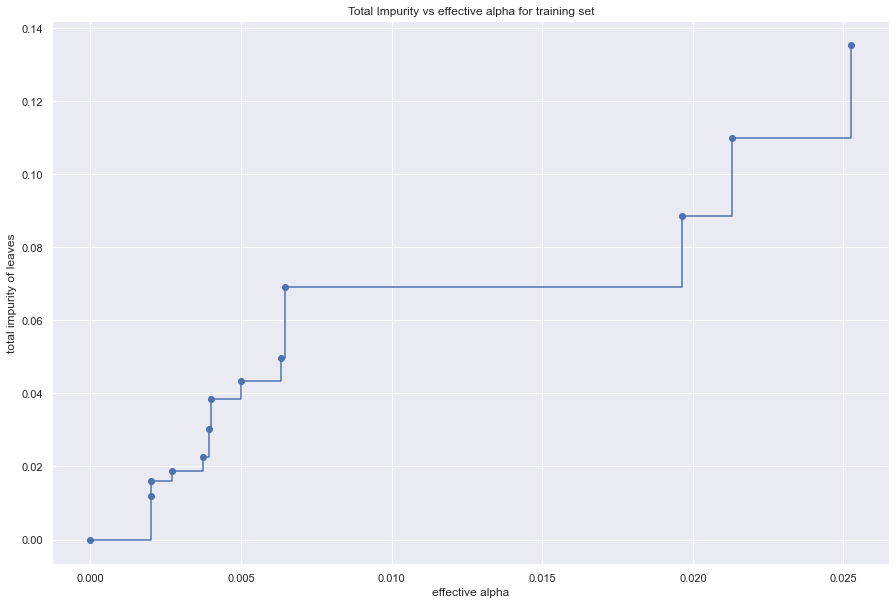

Max Depth 5


In [33]:
plt.figure(figsize=(15,15))
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
# plt.savefig(fig_dir+'bc_alphas.png')
plt.show()
print('Max Depth',grid.best_estimator_.tree_.max_depth)

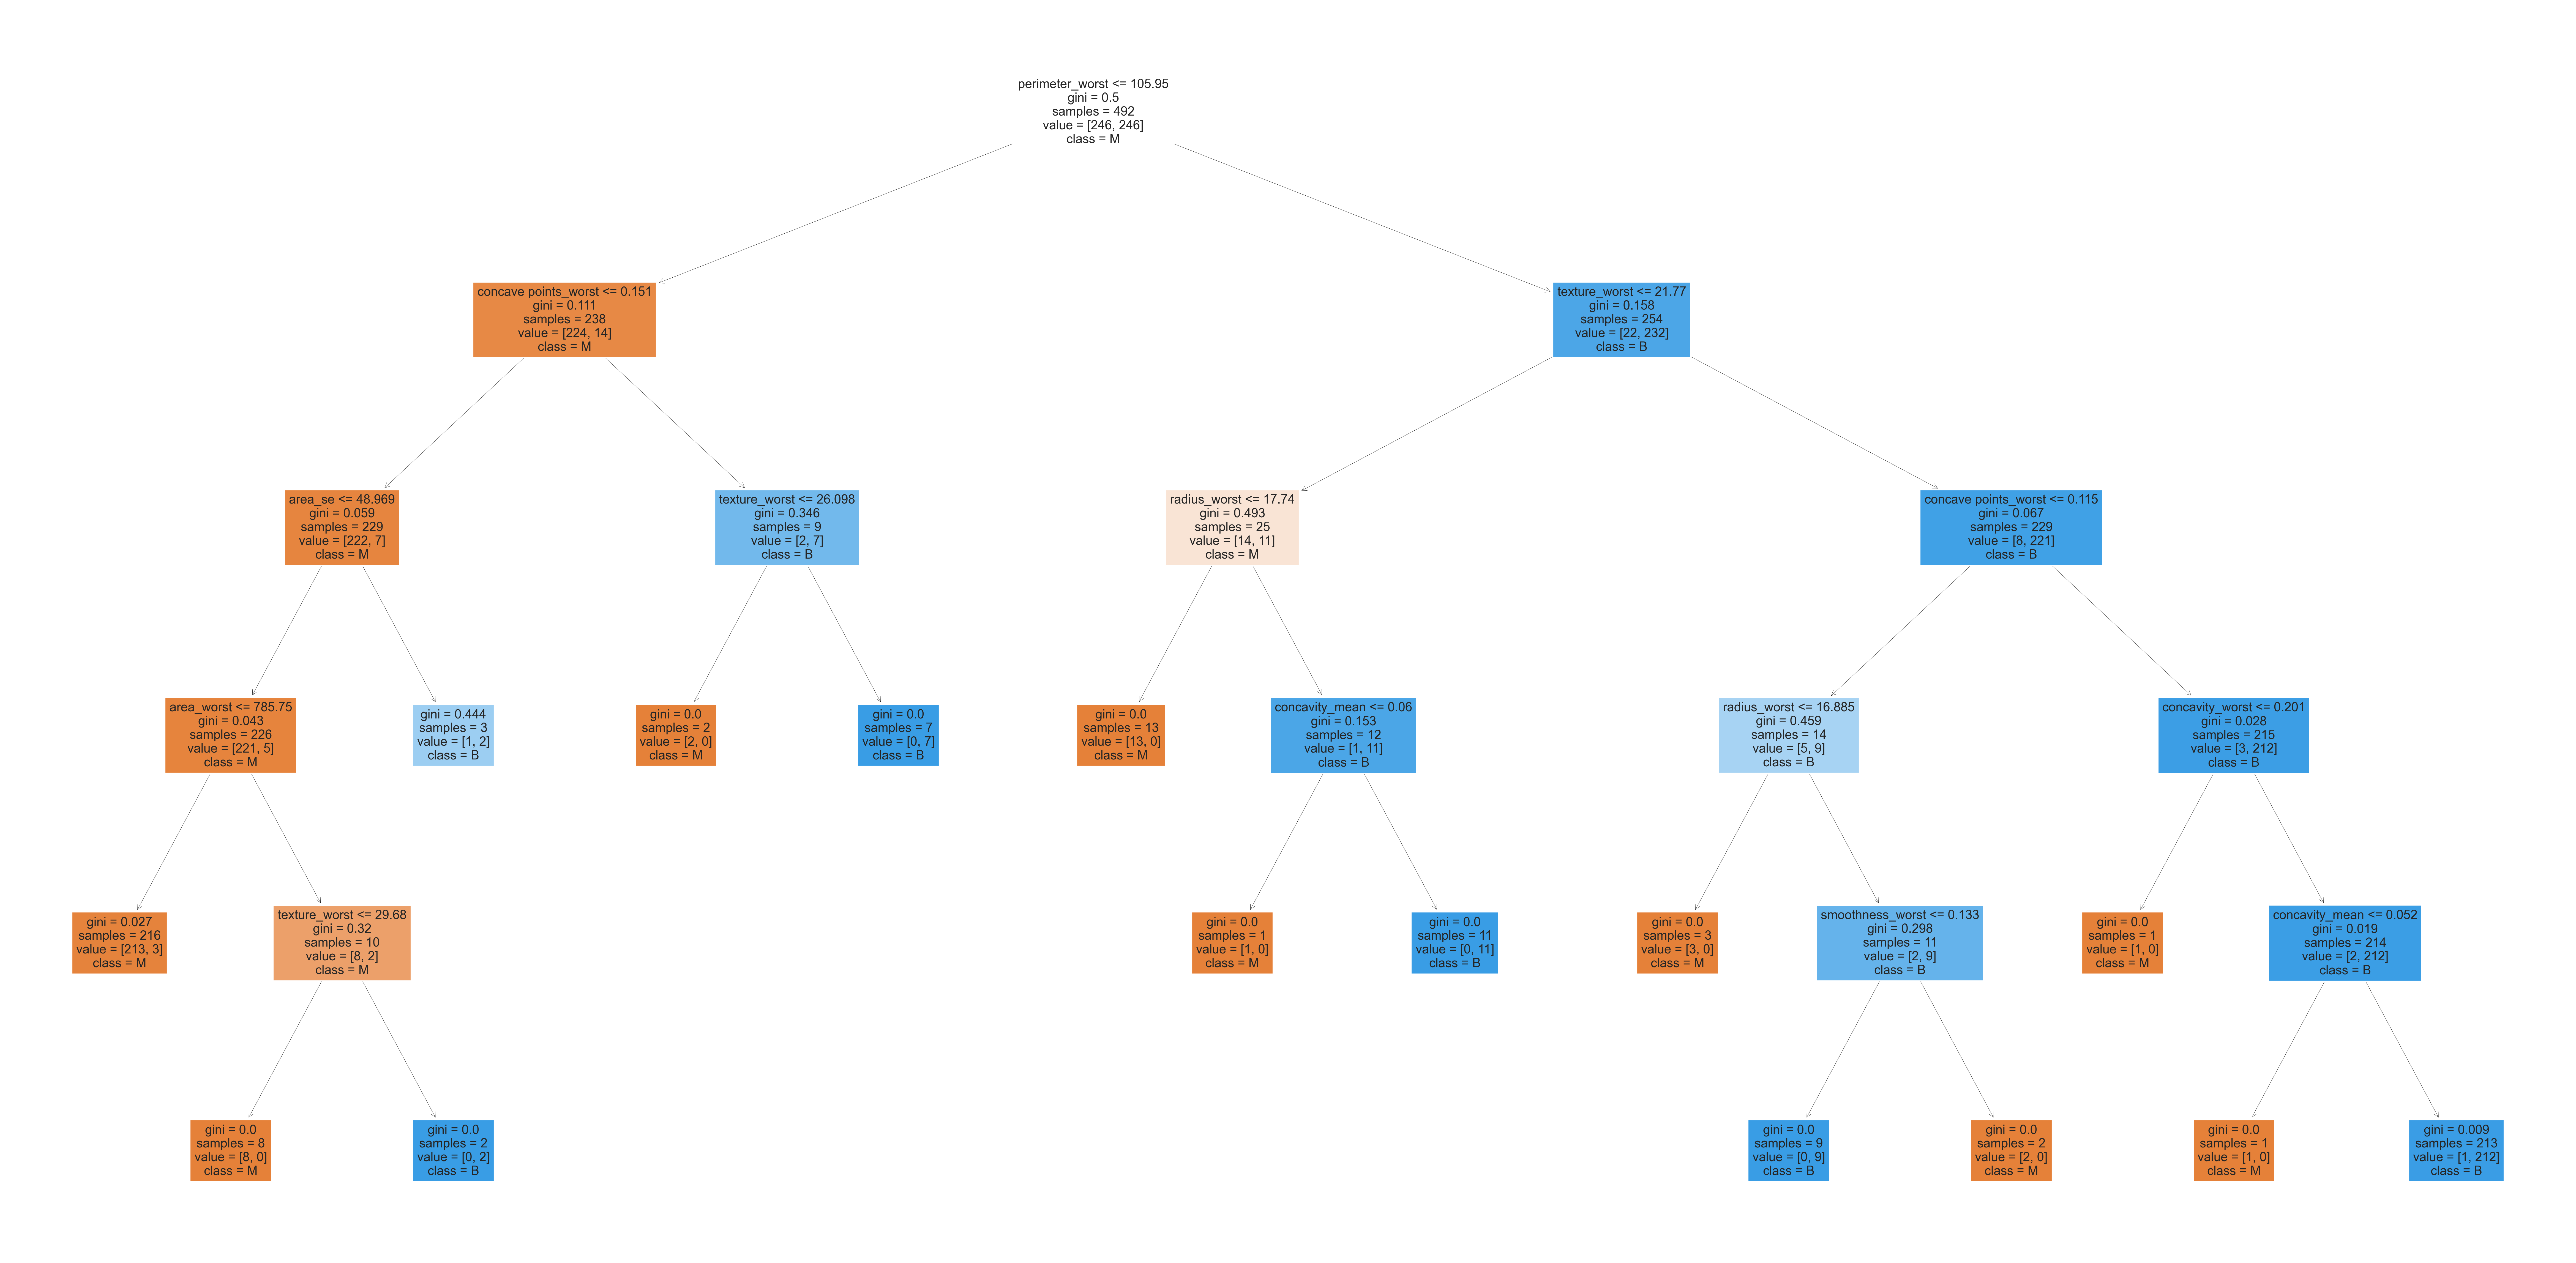

In [34]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,20), dpi=300)
out = tree.plot_tree(grid.best_estimator_,feature_names=X_train_fs.columns,
                     class_names=['M','B'],filled=True,fontsize=11
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(0.2)
# fig.savefig(fig_dir+"decistion_tree_postPrune.png")

<AxesSubplot:title={'center':'Confusion Matrix for Decision Tree'}>

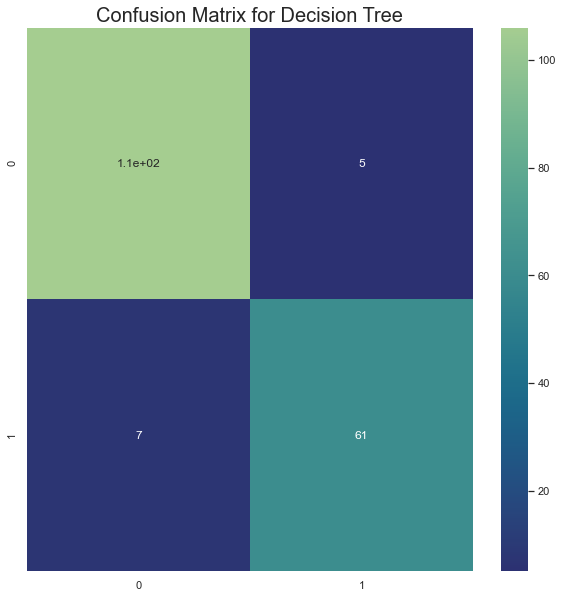

In [35]:
cm = confusion_matrix(y_test,grid_predictions)
plt.figure(figsize=(10,10))
plt.title("Confusion Matrix for Decision Tree",fontsize=20)
sns.heatmap(
        data=cm,
        cmap='crest_r',
        annot=True,
)
# plt.savefig(fig_dir+'cm_dt_post_prune.png')

<AxesSubplot:title={'center':'Confusion Matrix for Decision Tree'}>

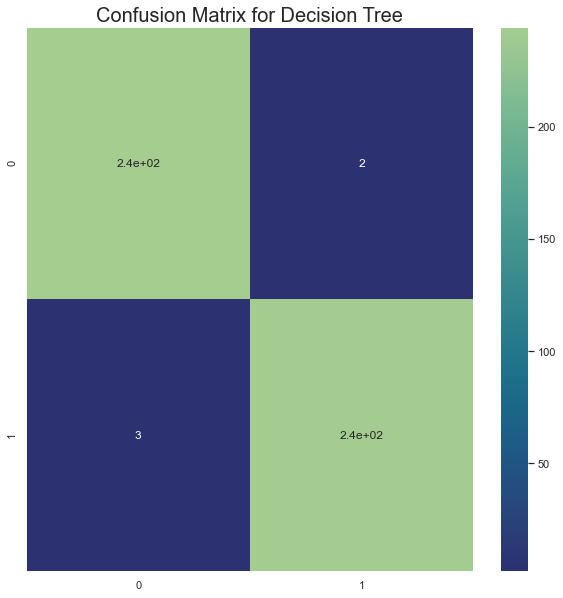

In [36]:
y_pred_train = grid.predict(X_train_fs)
cm = confusion_matrix(y_train_fs,y_pred_train)
plt.figure(figsize=(10,10))
plt.title("Confusion Matrix for Decision Tree",fontsize=20)
sns.heatmap(
        data=cm,
        cmap='crest_r',
        annot=True,
)
# plt.savefig(fig_dir+'cm_dt_post_prune_test.png')

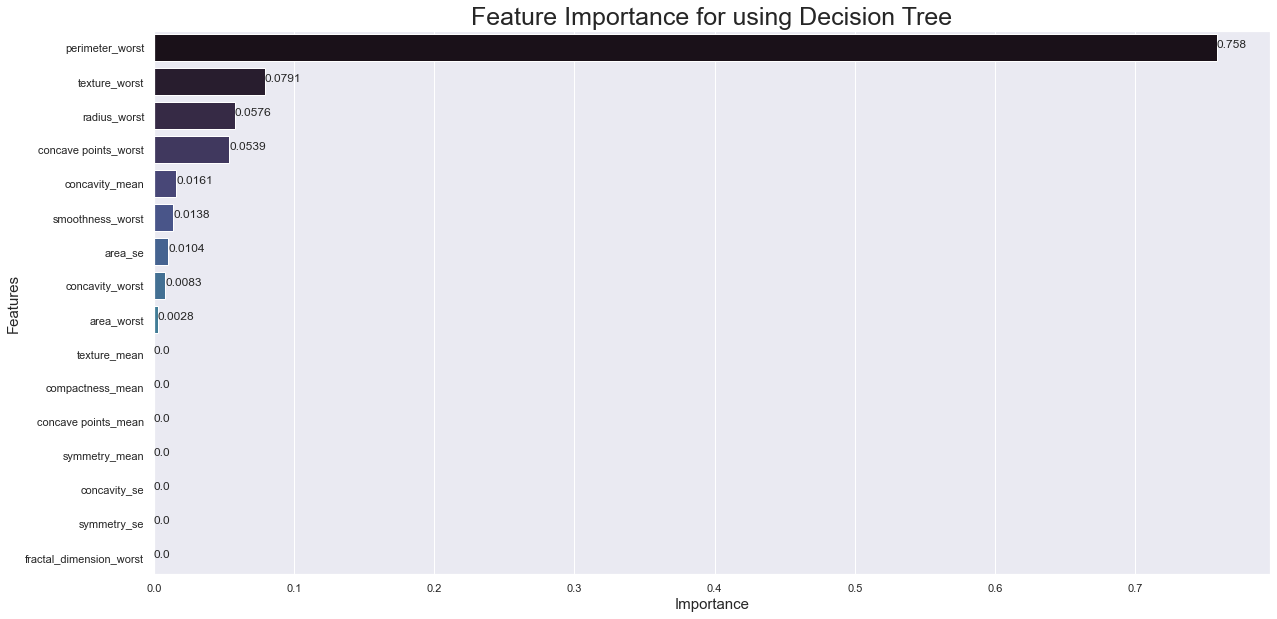

In [37]:
importances = list(grid.best_estimator_.feature_importances_)
columns = list(X_train_fs.columns.values)
n = len(importances)
for i in range(len(importances)-1):
    for j in range(0,n-i-1):
        if importances[j]<importances[j+1]:
            importances[j], importances[j+1] = importances[j+1], importances[j]
            columns[j], columns[j+1] = columns[j+1], columns[j]
            
plt.figure(figsize = (20,10))
fig = sns.barplot(y=columns,
            x=importances,
            palette='mako'
)
dt_ranking = columns
for index, value in enumerate(np.round(np.array(importances),4)):
    plt.text(value, index, str(value), fontsize=12)
plt.title('Feature Importance for using Decision Tree', fontsize=25)
plt.xlabel('Importance' , fontsize=15)
plt.ylabel('Features', fontsize=15)
# plt.savefig(fig_dir+'feat_impo_dt_bc_pruned.png')
plt.show()

In [38]:
from sklearn.metrics import classification_report
scores = classification_report(grid_predictions,y_test)
print(scores)

              precision    recall  f1-score   support

           B       0.95      0.94      0.95       113
           M       0.90      0.92      0.91        66

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179



### Question 2.3 

#### Choosing K

In [39]:
n_neighbors = np.arange(1,50,2)
parameters = {
    'n_neighbors':n_neighbors,
    'weights':['distance','uniform']
} 
knn = KNN(weights='distance')
clf = GridSearchCV(knn, parameters)
clf.fit(X_train_fs, y_train_fs)
clf.best_params_

{'n_neighbors': 29, 'weights': 'distance'}

In [40]:
clf.best_score_

0.9228818800247373

#### Robust Scalar

In [41]:
trans = RobustScaler()
X_train_scale = trans.fit_transform(X_train_fs)
X_test_scale = trans.transform(X_test_pp)

In [43]:
score_scale = cv_score(clf , X_train_scale , y_train_fs,cv=5).mean()
score_normal = cv_score(clf , X_train_fs,y_train_fs ,cv=5).mean()
print(score_scale)
print(score_normal)

0.9573696145124716
0.9208410636982066


Accuracy: 0.8938547486033519


<AxesSubplot:title={'center':'Confusion Matrix for KNN'}>

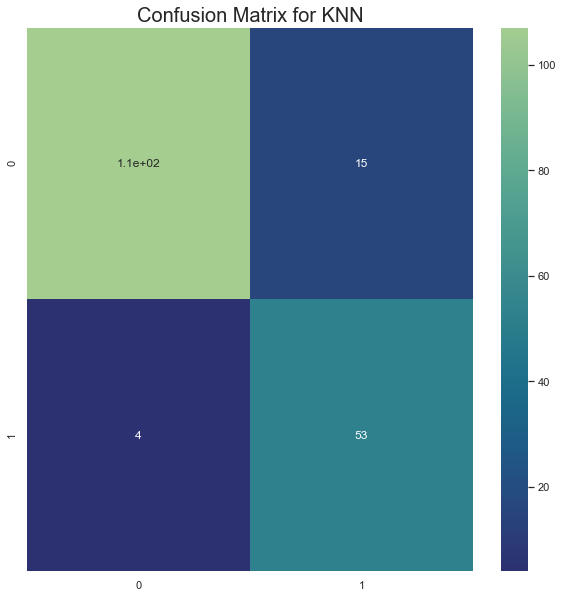

In [44]:
y_pred = clf.predict(X_test_pp)
acc = accuracy_score(y_pred,y_test)
print(f'Accuracy: {acc}')
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,10))
plt.title("Confusion Matrix for KNN",fontsize=20)
sns.heatmap(
        data=cm,
        cmap='crest_r',
        annot=True,
)
# plt.savefig(fig_dir+'cm_knn_test.png')

Accuracy: 1.0


<AxesSubplot:title={'center':'Confusion Matrix for KNN'}>

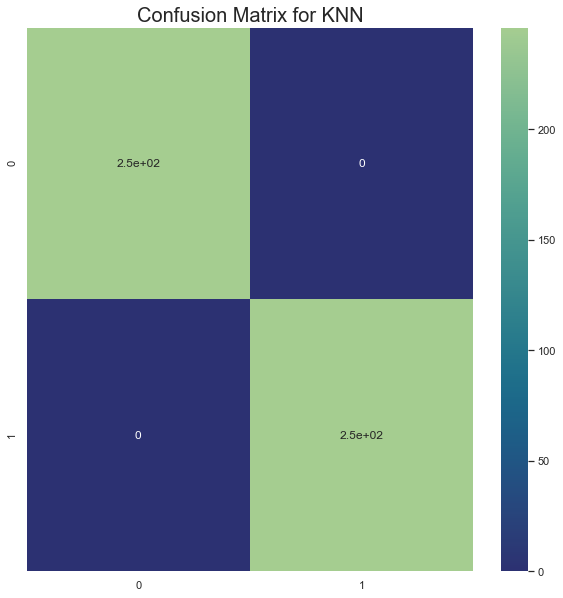

In [45]:
y_pred = clf.predict(X_train_fs)
acc = accuracy_score(y_pred,y_train_fs)
print(f'Accuracy: {acc}')
cm = confusion_matrix(y_pred,y_train_fs)
plt.figure(figsize=(10,10))
plt.title("Confusion Matrix for KNN",fontsize=20)
sns.heatmap(
        data=cm,
        cmap='crest_r',
        annot=True,
)
# plt.savefig(fig_dir+'cm_knn_train.png')

Accuracy: 1.0
Accuracy: 1.0


<AxesSubplot:title={'center':'Confusion Matrix for KNN'}>

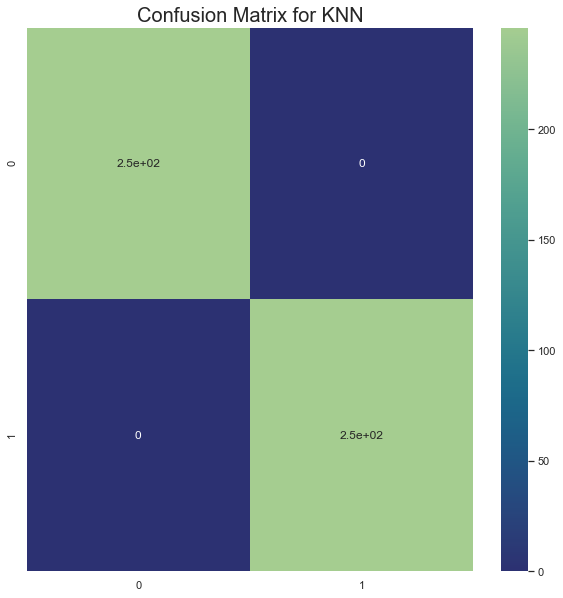

In [46]:
clf_ = KNN(n_neighbors=29, weights=  'distance')
clf_.fit(X_train_scale,y_train_fs)
y_pred = clf_.predict(X_train_scale)
acc = accuracy_score(y_pred,y_train_fs)
print(f'Accuracy: {acc}')
print(f'Accuracy: {acc}')
cm = confusion_matrix(y_pred,y_train_fs)
plt.figure(figsize=(10,10))
plt.title("Confusion Matrix for KNN",fontsize=20)
sns.heatmap(
        data=cm,
        cmap='crest_r',
        annot=True,
)
# plt.savefig(fig_dir+'cm_knn_train.png')

Accuracy: 0.9441340782122905
Scores:               precision    recall  f1-score   support

           B       0.95      0.95      0.95       111
           M       0.93      0.93      0.93        68

    accuracy                           0.94       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179



<AxesSubplot:title={'center':'Confusion Matrix for KNN'}>

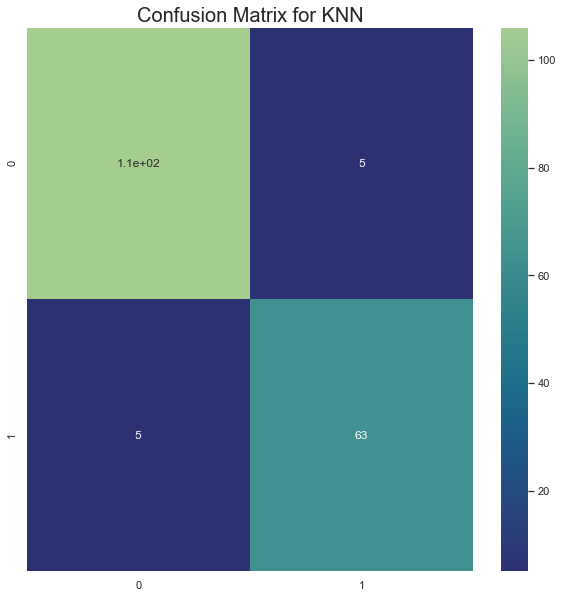

In [48]:

X_test_scale = trans.transform(X_test_pp)
y_pred = clf_.predict(X_test_scale)
acc = accuracy_score(y_pred,y_test)
scores = classification_report(y_pred,y_test)
print(f'Accuracy: {acc}')
print(f'Scores: {scores}')
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,10))
plt.title("Confusion Matrix for KNN",fontsize=20)
sns.heatmap(
        data=cm,
        cmap='crest_r',
        annot=True,
)
# plt.savefig(fig_dir+'cm_knn_test.png')